# Importing Libraries

In [462]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import mplfinance as mpf
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# getting all historical data

In [463]:
start_date = '2023-06-01'
end_date = '2024-07-28'
symbols = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'BNB': 'BNB-USD',
    'MANA': 'MANA-USD',
    'ATOM': 'ATOM-USD',
    'MATIC': 'MATIC-USD',
    'NEAR': 'NEAR-USD',
    'LINK': 'LINK-USD',
    'DOT': 'DOT-USD',
    'FIL': 'FIL-USD',
    'SAND': 'SAND-USD',
    'NEAR':'NEAR-USD',
    'XRP': 'XRP-USD'}
data = {symbol: yf.download(ticker, start=start_date, end=end_date) for symbol, ticker in symbols.items()}
df = {symbol: yf.download(ticker, start=start_date, end=end_date)['Adj Close'] for symbol, ticker in symbols.items()}
df = pd.DataFrame(df)

data['ETH']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-01,1873.914673,1887.705322,1846.227417,1862.201416,1862.201416,5640027197
2023-06-02,1862.423706,1910.278442,1851.964722,1907.256592,1907.256592,6097746022
2023-06-03,1907.420776,1908.822266,1885.485474,1892.412476,1892.412476,3472274607
2023-06-04,1892.398193,1912.205688,1885.651855,1890.513550,1890.513550,3747042696
2023-06-05,1890.417603,1890.640503,1780.211548,1811.828369,1811.828369,9246593033
...,...,...,...,...,...,...
2024-07-23,3440.768311,3539.531738,3395.420898,3481.995850,3481.995850,24468405650
2024-07-24,3482.151855,3487.653076,3304.039307,3336.339355,3336.339355,16040945448
2024-07-25,3336.362305,3341.438477,3088.764404,3174.427246,3174.427246,25293745810


# Automatic Creating portfolio

## 10 JUNE

In [464]:
first_instructions = {
    'BTC': [
        {"price": 28500, "weight": 0.10, "activated": False},
        {"price": 25000, "weight": 0.15, "activated": False},
        {"price": 23000, "weight": 0.25, "activated": False},
        {"price": 17000, "weight": 0.25, "activated": False},
        {"price": 15000, "weight": 0.25, "activated": False}
    ],
    'ETH': [
        {"price": 1850, "weight": 0.10, "activated": False},
        {"price": 1500, "weight": 0.15, "activated": False},
        {"price": 1400, "weight": 0.25, "activated": False},
        {"price": 1200, "weight": 0.25, "activated": False},
        {"price": 880, "weight": 0.25, "activated": False}
    ],
    
    'BNB': [
        {"price": 330, "weight": 0.10, "activated": False},
        {"price": 300, "weight": 0.15, "activated": False},
        {"price": 280, "weight": 0.20, "activated": False},
        {"price": 220, "weight": 0.25, "activated": False},
        {"price": 180, "weight": 0.30, "activated": False}
    ],
    'DOT': [
        {"price": 5.8, "weight": 0.10, "activated": False},
        {"price": 5.5, "weight": 0.15, "activated": False},
        {"price": 5, "weight": 0.20, "activated": False},
        {"price": 4.8, "weight": 0.25, "activated": False},
        {"price": 3.5, "weight": 0.30, "activated": False}
    ],
    'MANA': [
        {"price": 0.5, "weight": 0.10, "activated": False},
        {"price": 0.48, "weight": 0.15, "activated": False},
        {"price": 0.31, "weight": 0.20, "activated": False},
        {"price": 0.24, "weight": 0.25, "activated": False},
        {"price": 0.18, "weight": 0.30, "activated": False}
    ],
    'ATOM': [
        {"price": 10, "weight": 0.10, "activated": False},
        {"price": 9, "weight": 0.15, "activated": False},
        {"price": 7, "weight": 0.20, "activated": False},
        {"price": 5.5, "weight": 0.25, "activated": False},
        {"price": 3.5, "weight": 0.30, "activated": False}
    ]}
#     'MATIC': [
#         {"price": 0.5, "weight": 0.20, "activated": False},
#         {"price": 0.33, "weight": 0.30, "activated": False},
#         {"price": 0.21, "weight": 0.50, "activated": False}
#     ],
#     'NEAR': [
#         {"price": 1.2, "weight": 0.20, "activated": False},
#         {"price": 0.87, "weight": 0.30, "activated": False},
#         {"price": 0.62, "weight": 0.50, "activated": False}
#     ],
#     'LINK': [
#         {"price": 5, "weight": 0.10, "activated": False},
#         {"price": 3.5, "weight": 0.15, "activated": False},
#         {"price": 1.5, "weight": 0.20, "activated": False}
#     ]
# }

[*********************100%%**********************]  1 of 1 completed

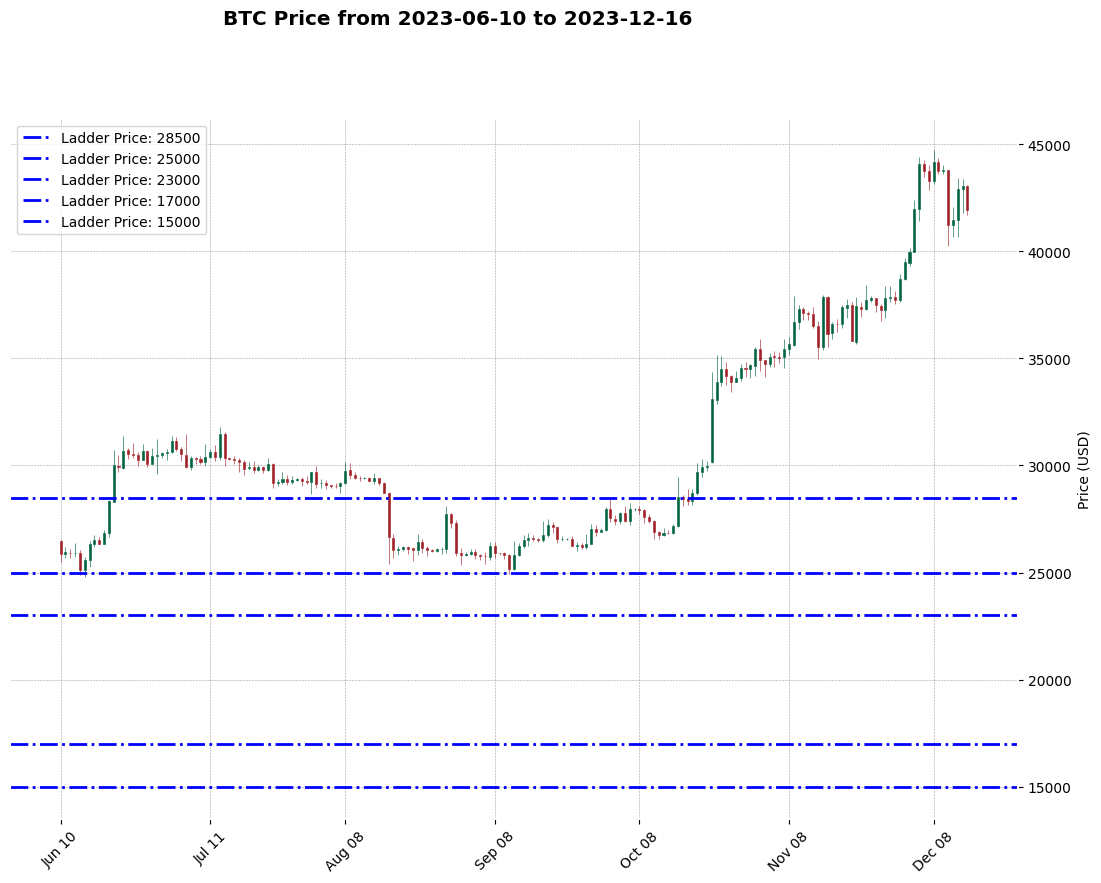

[*********************100%%**********************]  1 of 1 completed


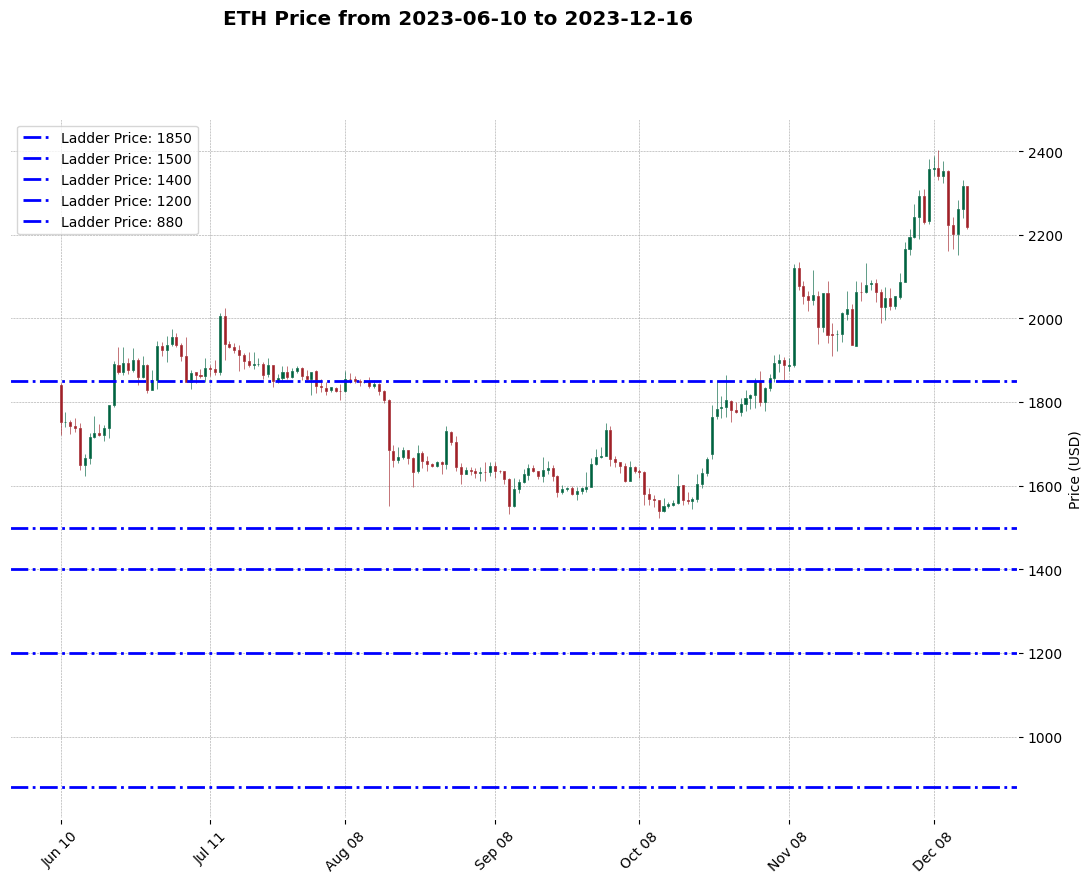

[*********************100%%**********************]  1 of 1 completed


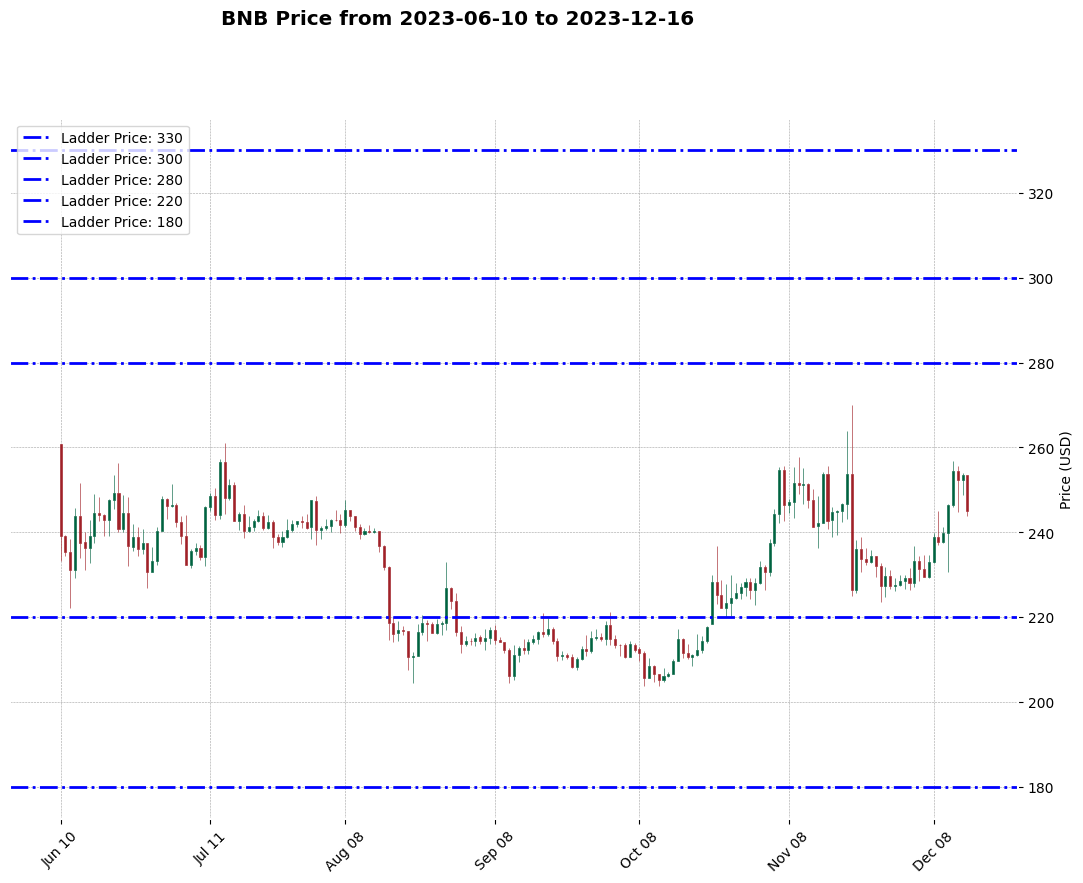

[*********************100%%**********************]  1 of 1 completed


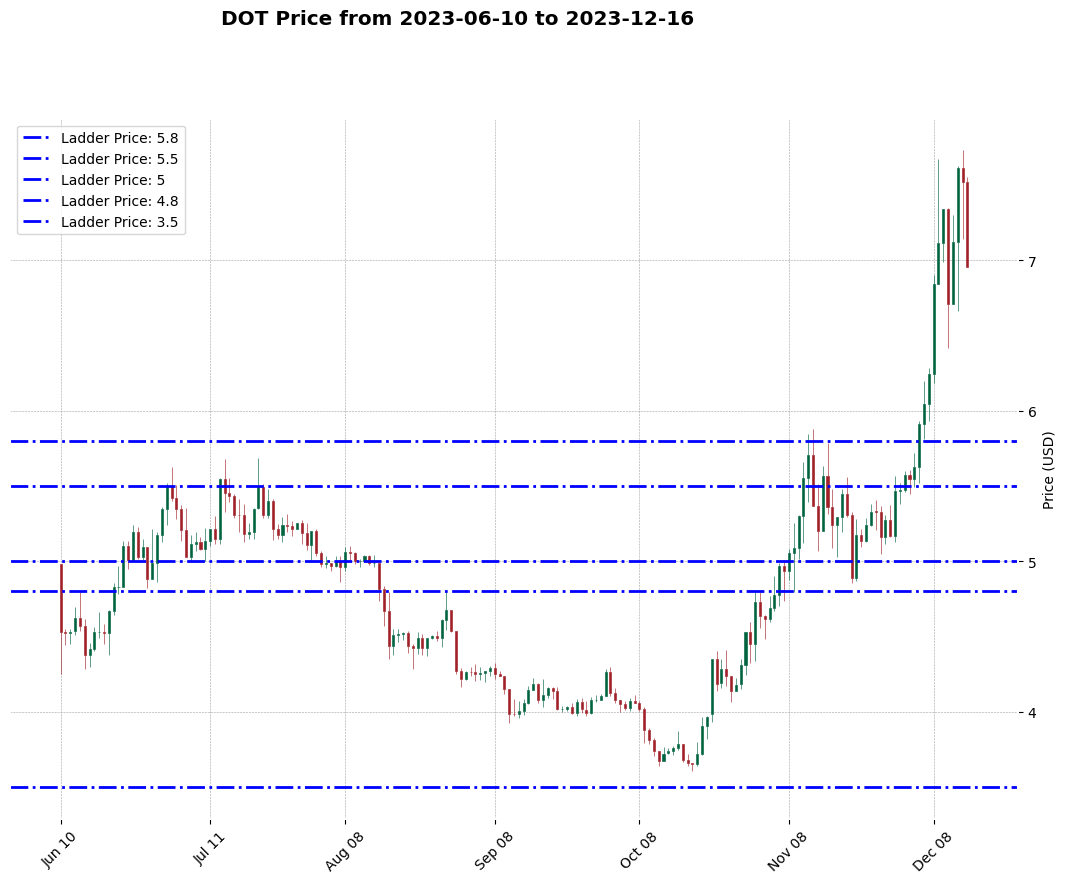

[*********************100%%**********************]  1 of 1 completed


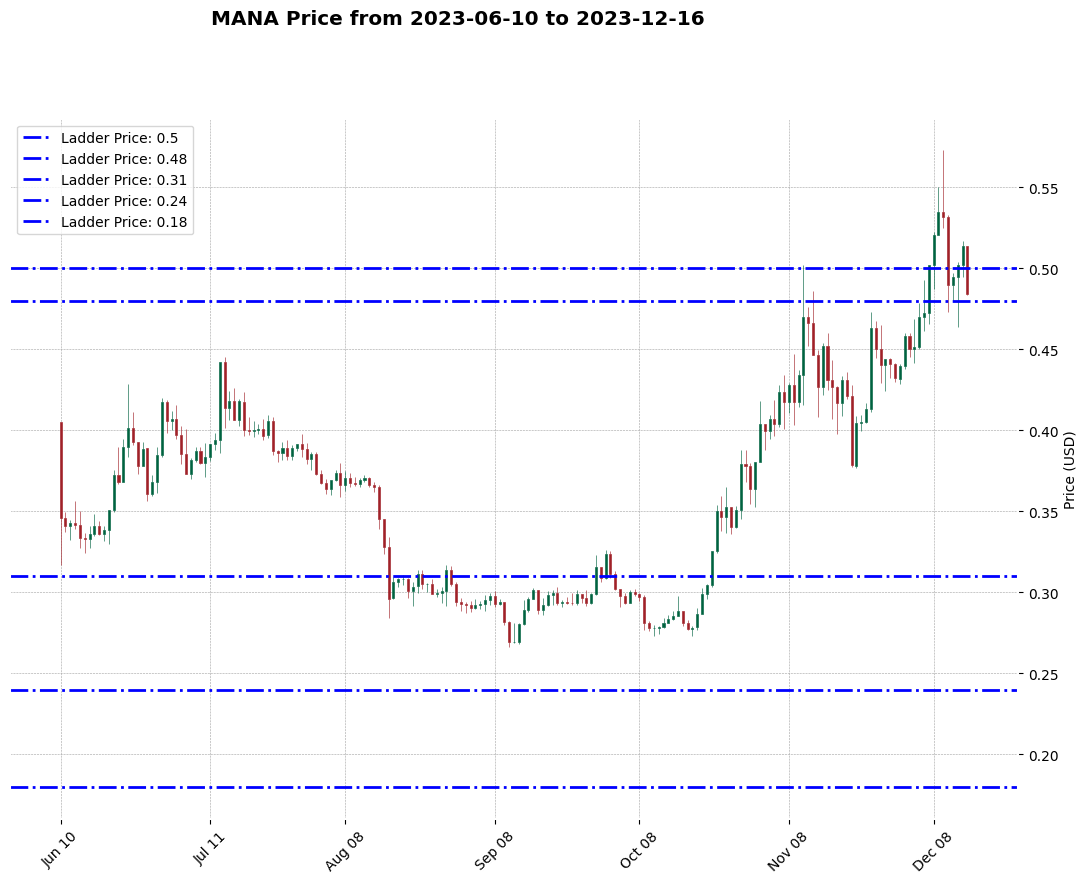

[*********************100%%**********************]  1 of 1 completed


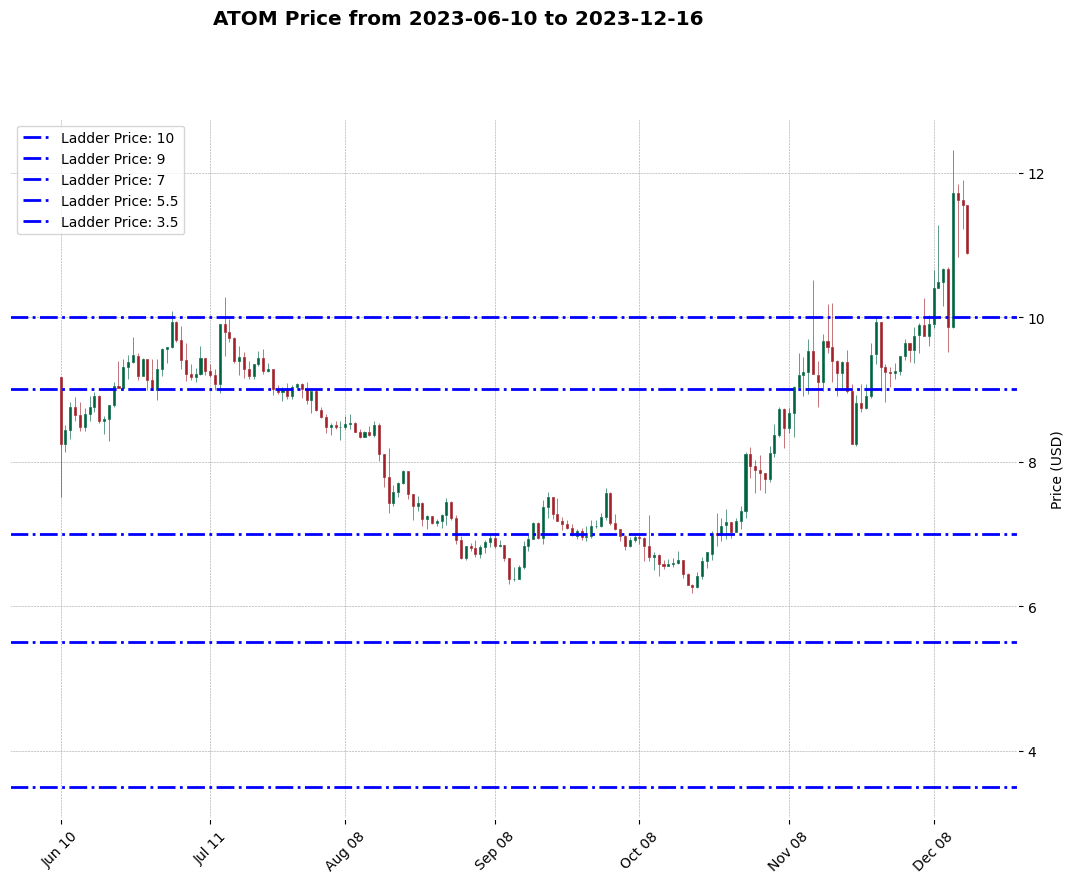

In [465]:
crypto_symbols = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'BNB': 'BNB-USD',
    'DOT': 'DOT-USD',
    'MANA': 'MANA-USD',
    'ATOM': 'ATOM-USD'
}

# Define the date range
start_date = '2023-06-10'
end_date = '2023-12-16'

# Fetch and plot the data
for crypto, ticker in crypto_symbols.items():
    # Fetch historical data
    data1 = yf.download(ticker, start=start_date, end=end_date)
    
    # Plot the candlestick chart
    fig, ax = mpf.plot(data1, type='candle', style='charles', title=f'{crypto} Price from {start_date} to {end_date}',
                       ylabel='Price (USD)', returnfig=True, figsize=(14, 10))
    
    # Plot the ladder prices and find collision points
    for instruction in first_instructions[crypto]:
        ax[0].axhline(y=instruction['price'], color='blue', linestyle='-.', label=f'Ladder Price: {instruction["price"]}')
        
        # Find collision points
        collision_points = data1[data1['Close'] == instruction['price']]
        ax[0].scatter(collision_points.index, collision_points['Close'], color='green', zorder=10)
    
    # Enhance the legend
    handles, labels = ax[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax[0].legend(by_label.values(), by_label.keys(), loc='upper left')
    
    plt.show()

## automatic transactions

In [466]:
portfolio1 = {symbol: 0 for symbol in symbols}
cash = 10000
investments = {
    'BTC': 0.27 *cash ,
    'ETH': 0.27* cash,
    'BNB': 0.1125 * cash,
    'DOT': 0.1125 * cash,
    'MANA': 0.0675 * cash,
    'ATOM': 0.0675 * cash,
    'MATIC': 0.0500 * cash,
    'NEAR': 0 * cash,
    'LINK': 0.0500 *cash
}


In [467]:
transactions = []
start_date = '2023-06-10'
end_date = '2023-12-16'

filtered_data = data['ETH'].loc[start_date:end_date]

for date in filtered_data.index:
    for symbol in symbols:
        if symbol not in data:
            continue  # Skip this symbol if it does not exist in the data
        price = data[symbol].loc[date, 'Low']
        
        if symbol not in first_instructions:
            continue  # Skip this symbol if it does not exist in first_instructions
        
        for ladder in first_instructions[symbol]:
            # print(ladder)
            if not ladder['activated'] and price <= ladder['price']:
                amount_to_invest = ladder['weight'] * investments[symbol]
                amount_crypto = amount_to_invest / ladder['price']
                portfolio1[symbol] += amount_crypto
                investments[symbol] -= amount_to_invest
                cash -= amount_to_invest  # Update cash correctly
                ladder['activated'] = True
                transactions.append({
                    'date': date,
                    'symbol': symbol,
                    'price': ladder['price'],
                    'amount_crypto': amount_crypto,
                    'type' : 'buy',
                    'investment': amount_to_invest
                })


In [468]:
def add_buy_transaction(transactions_df, date, symbol, price, amount_crypto, investment):
    new_transaction = {
        'date': date,
        'symbol': symbol,
        'price': price,
        'amount_crypto': amount_crypto,
        'type': 'buy',
        'investment': investment
    }
    new_transaction_df = pd.DataFrame([new_transaction])
    transactions_df = pd.concat([transactions_df, new_transaction_df], ignore_index=True)
    return transactions_df


In [469]:
cash

7354.450000000001

In [470]:
transactions_df = pd.DataFrame(transactions)
transactions_df

,date,symbol,price,amount_crypto,type,investment
0,2023-06-10,BTC,28500.00,0.009474,buy,270.000
1,2023-06-10,ETH,1850.00,0.145946,buy,270.000
2,2023-06-10,BNB,330.00,0.340909,buy,112.500
3,2023-06-10,BNB,300.00,0.506250,buy,151.875
4,2023-06-10,BNB,280.00,0.614732,buy,172.125
5,2023-06-10,MANA,0.50,135.000000,buy,67.500
6,2023-06-10,MANA,0.48,189.843750,buy,91.125
7,2023-06-10,ATOM,10.00,6.750000,buy,67.500
8,2023-06-10,ATOM,9.00,10.125000,buy,91.125
9,2023-06-10,DOT,5.80,19.396552,buy,112.500


## Sell manually in 15 December

In [471]:
portfolio1

{'BTC': 0.024053684210526317,
 'ETH': 0.14594594594594595,
 'BNB': 2.2442775974025975,
 'MANA': 657.9889112903227,
 'ATOM': 31.62857142857143,
 'MATIC': 0,
 'NEAR': 0,
 'LINK': 0,
 'DOT': 117.29456308777429,
 'FIL': 0,
 'SAND': 0,
 'XRP': 0}

In [472]:
# def add_sell_transaction(transactions_df, date, symbol, price, amount_crypto, investment):
#     new_transaction = {
#         'date': date,
#         'symbol': symbol,
#         'price': price,
#         'amount_crypto': amount_crypto,
#         'type': 'sell',
#         'investment': investment
#     }
#     new_transaction_df = pd.DataFrame([new_transaction])
#     # print(transaction_df )
#     transactions_df = pd.concat([transactions_df, new_transaction_df], ignore_index=True)
#     print(transactions_df )

#     return 

In [473]:
# remove = ['BNB', 'MANA', 'ATOM', 'DOT']
# for symbol in remove:
#     print(f'"{symbol}"')
#     add_sell_transaction(transactions_df, '2023-12-15', symbol, df.loc['2023-12-15', symbol], portfolio1[symbol], portfolio1[symbol] * df.loc['2023-12-15', symbol])

# Buy function

In [474]:
def add_buy_transaction(transactions, date, symbol, price, amount_crypto, investment):
    global cash  # Use the global cash variable
    transactions.append({
                    'date': date,
                    'symbol': symbol,
                    'price': price,
                    'amount_crypto': amount_crypto,
                    'type' : 'buy',
                    'investment': investment
                })

    portfolio1[symbol] += amount_crypto
    cash -= investment
    return transactions

# Sell function

In [475]:
def add_sell_transaction(transactions, date, symbol, price, amount_crypto, investment):
    global cash  # Use the global cash variable
    transactions.append({
                    'date': date,
                    'symbol': symbol,
                    'price': price,
                    'amount_crypto': amount_crypto,
                    'type' : 'sell',
                    'investment': investment
                })

    portfolio1[symbol] -= amount_crypto
    cash += investment
    return transactions

In [476]:



remove = ['BNB', 'MANA', 'ATOM', 'DOT']
for symbol in remove:

    add_sell_transaction(
        transactions,
        '2023-12-15',
        symbol,
        df.loc['2023-12-15', symbol],
        portfolio1[symbol],
        portfolio1[symbol] * df.loc['2023-12-15', symbol]
    )

# Now transactions_df should contain the new transactions
# print(transactions_df)
# print(f'Updated portfolio: {portfolio1}')
# print(f'Cash: {cash}')

In [477]:
transactions_df

,date,symbol,price,amount_crypto,type,investment
0,2023-06-10,BTC,28500.00,0.009474,buy,270.000
1,2023-06-10,ETH,1850.00,0.145946,buy,270.000
2,2023-06-10,BNB,330.00,0.340909,buy,112.500
3,2023-06-10,BNB,300.00,0.506250,buy,151.875
4,2023-06-10,BNB,280.00,0.614732,buy,172.125
5,2023-06-10,MANA,0.50,135.000000,buy,67.500
6,2023-06-10,MANA,0.48,189.843750,buy,91.125
7,2023-06-10,ATOM,10.00,6.750000,buy,67.500
8,2023-06-10,ATOM,9.00,10.125000,buy,91.125
9,2023-06-10,DOT,5.80,19.396552,buy,112.500


In [478]:
cash

9382.836382034093

In [479]:
portfolio1

{'BTC': 0.024053684210526317,
 'ETH': 0.14594594594594595,
 'BNB': 0.0,
 'MANA': 0.0,
 'ATOM': 0.0,
 'MATIC': 0,
 'NEAR': 0,
 'LINK': 0,
 'DOT': 0.0,
 'FIL': 0,
 'SAND': 0,
 'XRP': 0}

# 16 DECEMBER

In [480]:
start_date_new = '2023-12-16'
end_date_new = '2024-07-28'
second_instructions = {
    'BTC': [
        {"price": 41000, "weight": 0.05, "activated": False},
        {"price": 36000, "weight": 0.05, "activated": False},
        {"price": 34000, "weight": 0.1, "activated": False},
        {"price": 32000, "weight": 0.1, "activated": False},
        {"price": 29000, "weight": 0.1, "activated": False},
        {"price": 25000, "weight": 0.1, "activated": False},
        {"price": 23000, "weight": 0.15, "activated": False},
        {"price": 19000, "weight": 0.15, "activated": False},
        {"price": 15000, "weight": 0.2, "activated": False}
    ],

    'ETH': [
        {"price": 2100, "weight": 0.1, "activated": False},
        {"price": 1950, "weight": 0.15, "activated": False},
        {"price": 1800, "weight": 0.2, "activated": False},
        {"price": 1550, "weight": 0.25, "activated": False},
        {"price": 880, "weight": 0.3, "activated": False}
    ],

    'DOT': [
        {"price": 5, "weight": 0.1, "activated": False},
        {"price": 4.4, "weight": 0.15, "activated": False},
        {"price": 4, "weight": 0.2, "activated": False},
        {"price": 3.5, "weight": 0.25, "activated": False},
        {"price": 3, "weight": 0.3, "activated": False}
    ],

    'LINK': [
        {"price": 17.50, "weight": 0.1, "activated": False},
        {"price": 16.50, "weight": 0.15, "activated": False},
        {"price": 15.50, "weight": 0.2, "activated": False},
        {"price": 14.53, "weight": 0.25, "activated": False},
        {"price": 13.51, "weight": 0.3, "activated": False}
    ],

    'FIL': [
        {"price": 12.5, "weight": 0.1, "activated": False},
        {"price": 10, "weight": 0.15, "activated": False},
        {"price": 8, "weight": 0.2, "activated": False},
        {"price": 6, "weight": 0.25, "activated": False},
        {"price": 4, "weight": 0.30, "activated": False}
    ],

    'SAND': [
        {"price": 0.37, "weight": 0.1, "activated": False},
        {"price": 0.3, "weight": 0.15, "activated": False},
        {"price": 0.25, "weight": 0.2, "activated": False},
        {"price": 0.19, "weight": 0.25, "activated": False},
        {"price": 0.14, "weight": 0.3, "activated": False}
    ],
        'MATIC': [
        {"price": 0.65, "weight": 0.1, "activated": False},
        {"price": 0.47, "weight": 0.15, "activated": False},
        {"price": 0.26, "weight": 0.2, "activated": False}
    ],
        'NEAR': [
        {"price": 1.7, "weight": 0.1, "activated": False},
        {"price": 1.2, "weight": 0.15, "activated": False},
        {"price": 0.7, "weight": 0.2, "activated": False}
    ]
}


### plot

[*********************100%%**********************]  1 of 1 completed

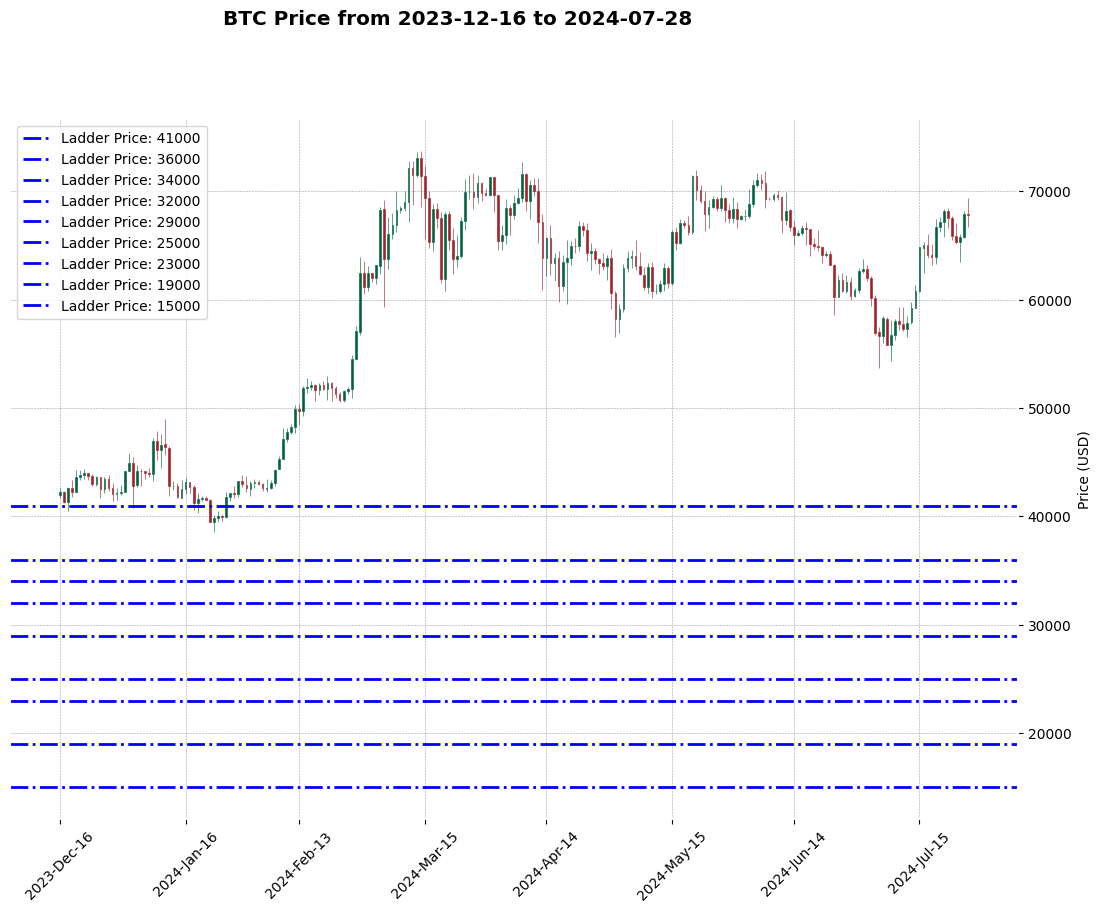

[*********************100%%**********************]  1 of 1 completed


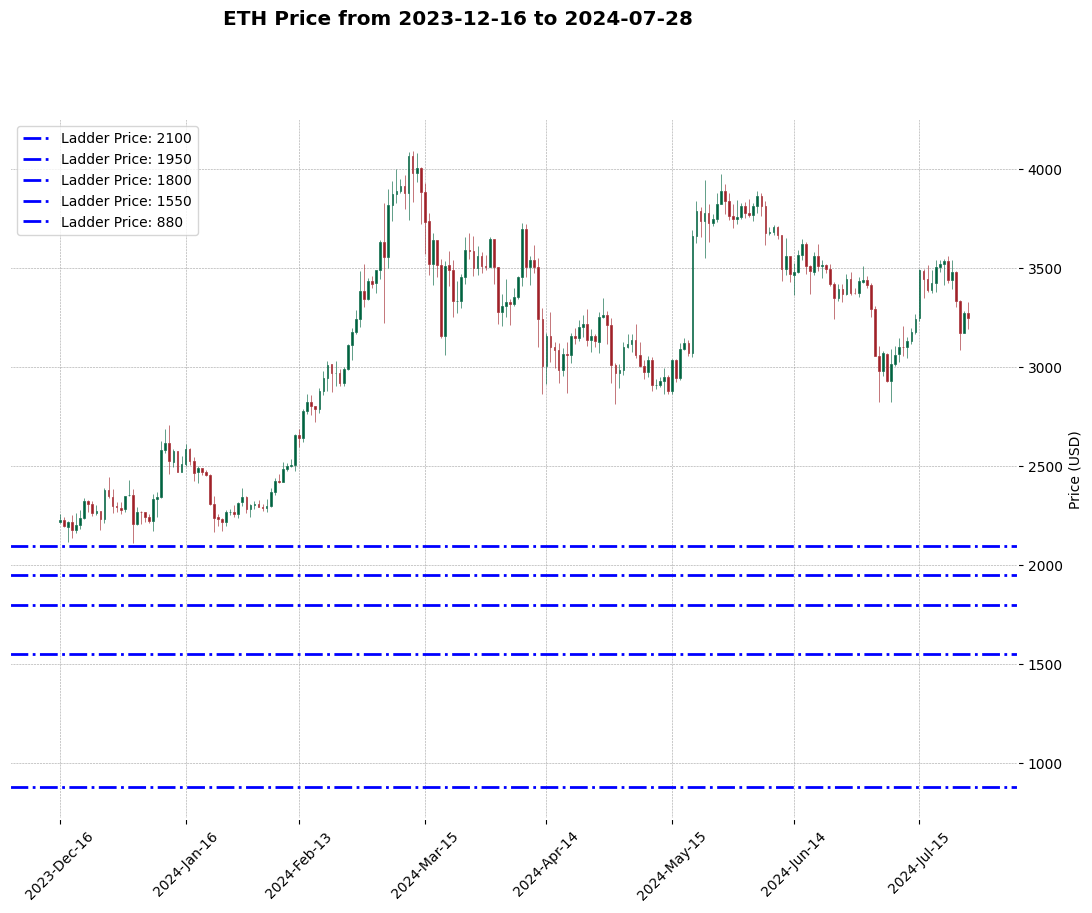

[*********************100%%**********************]  1 of 1 completed


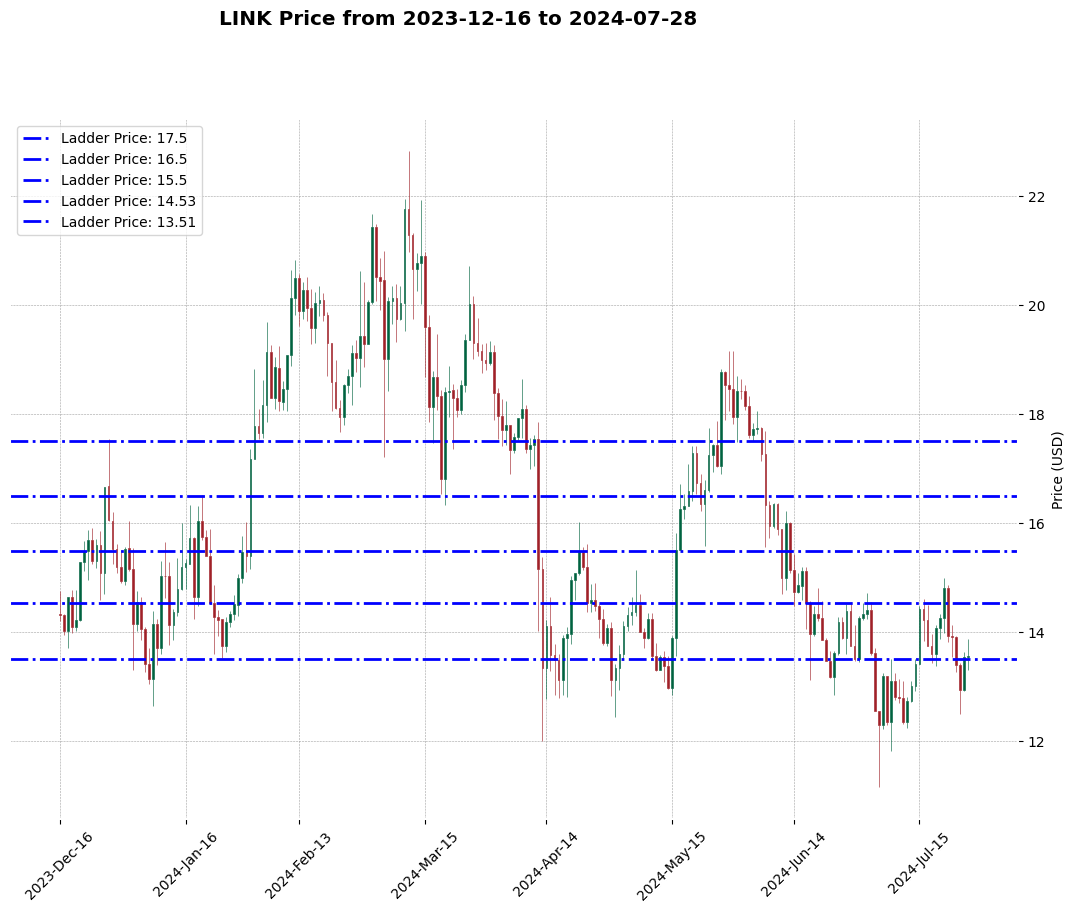

[*********************100%%**********************]  1 of 1 completed


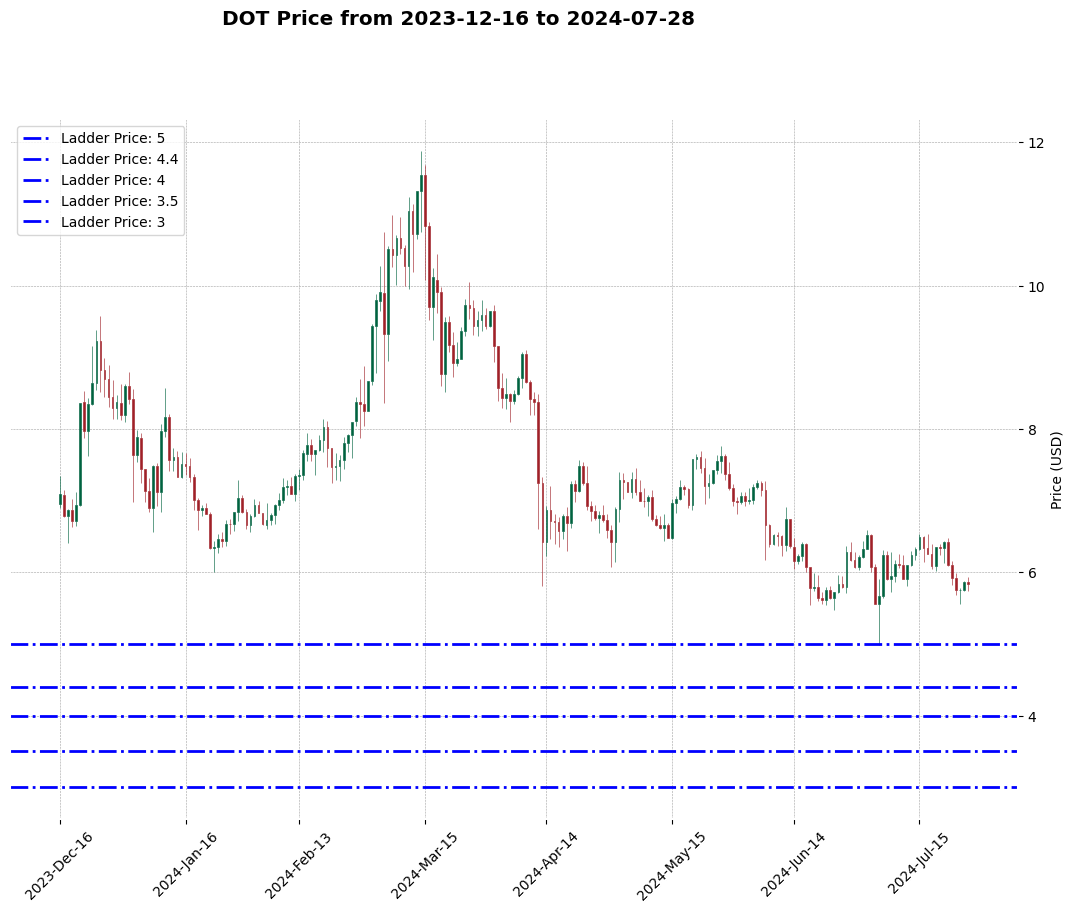

[*********************100%%**********************]  1 of 1 completed


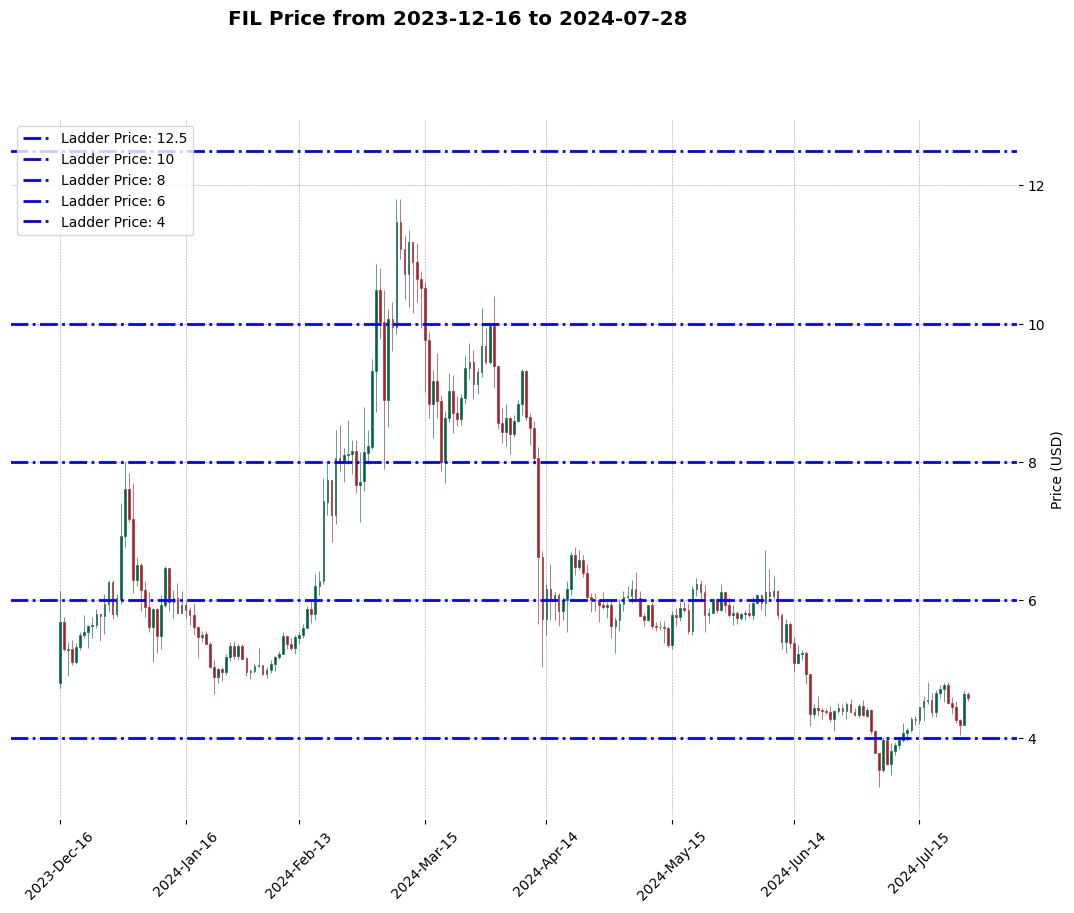

[*********************100%%**********************]  1 of 1 completed


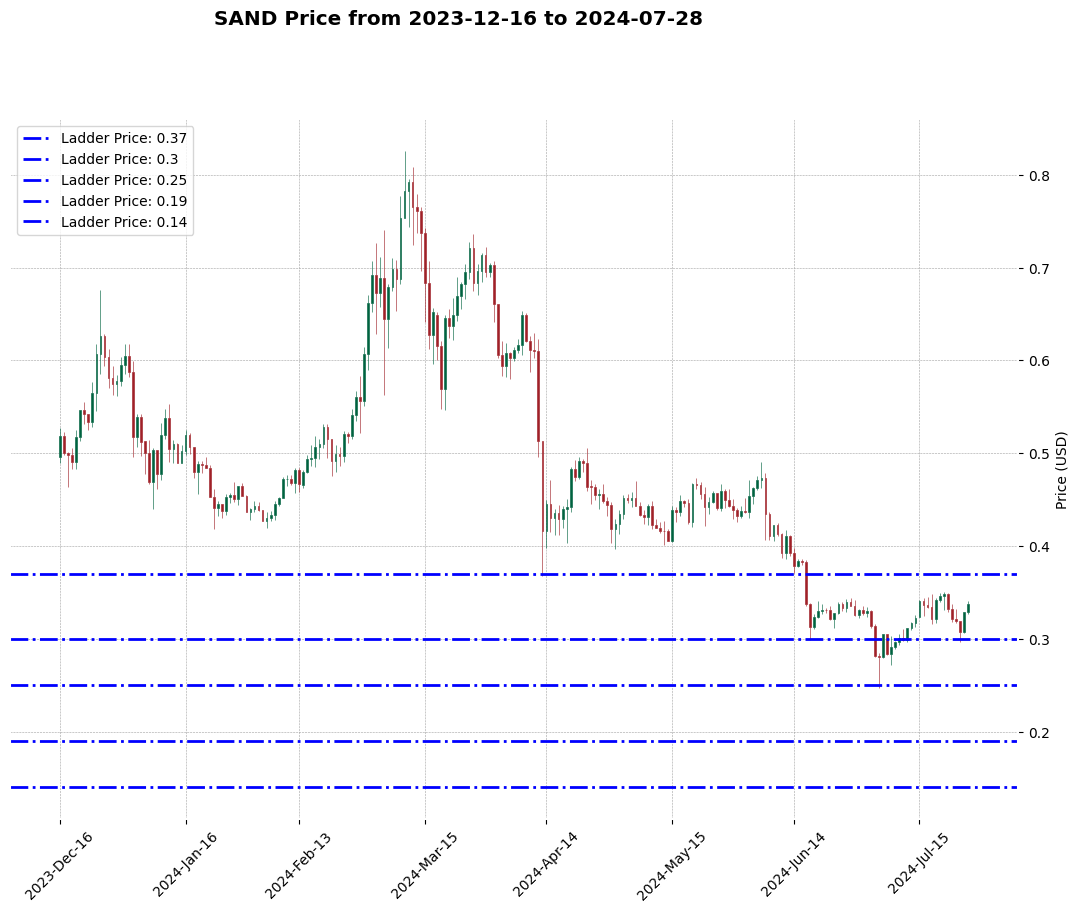

[*********************100%%**********************]  1 of 1 completed


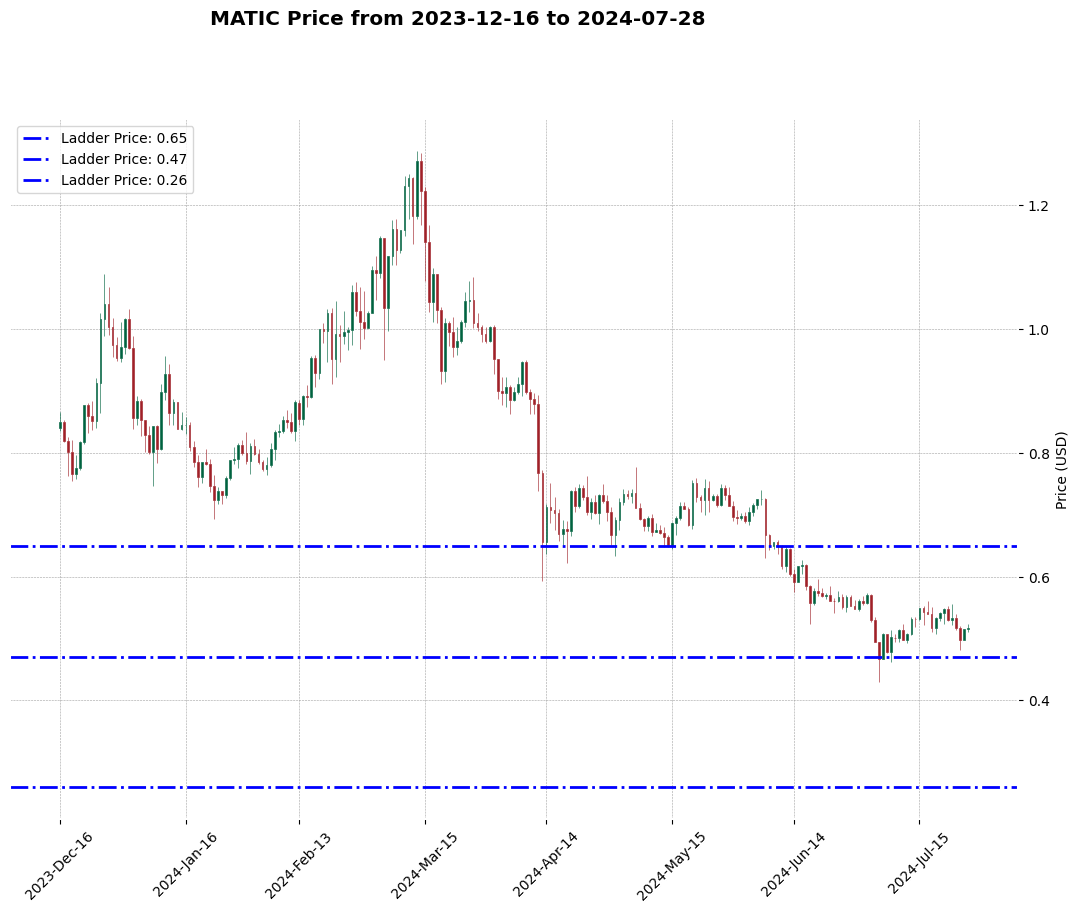

[*********************100%%**********************]  1 of 1 completed


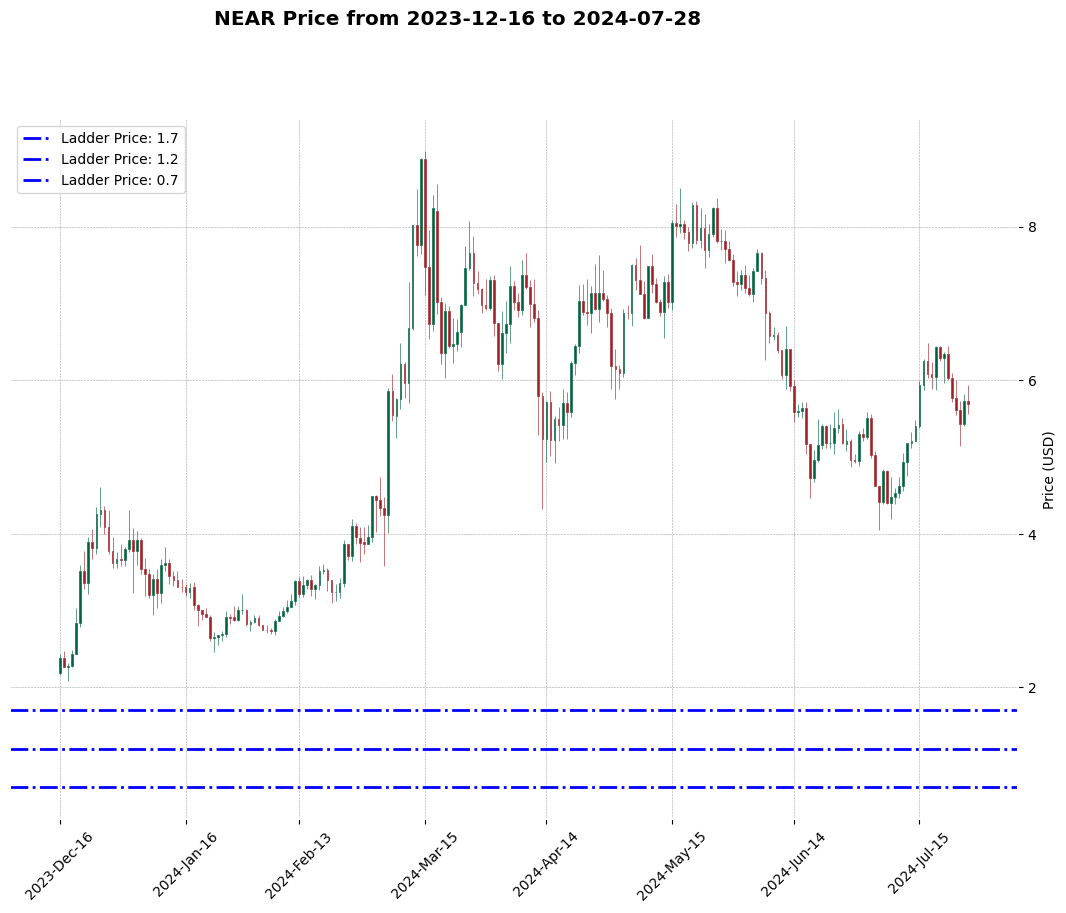

In [481]:
crypto_symbols = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'LINK': 'LINK-USD',
    'DOT': 'DOT-USD',
    'FIL': 'FIL-USD',
    'SAND': 'SAND-USD',
    'MATIC': 'MATIC-USD',
    'NEAR': 'NEAR-USD'

}

# Define the date range
start_date = '2023-12-16'
end_date = '2024-07-28'

# Fetch and plot the data
for crypto, ticker in crypto_symbols.items():
    # Fetch historical data
    data1 = yf.download(ticker, start=start_date, end=end_date)
    
    # Plot the candlestick chart
    fig, ax = mpf.plot(data1, type='candle', style='charles', title=f'{crypto} Price from {start_date} to {end_date}',
                       ylabel='Price (USD)', returnfig=True, figsize=(14, 10))
    
    # Plot the ladder prices and find collision points
    for instruction in second_instructions[crypto]:
        ax[0].axhline(y=instruction['price'], color='blue', linestyle='-.', label=f'Ladder Price: {instruction["price"]}')
        
        # Find collision points
        collision_points = data1[data1['Close'] == instruction['price']]
        ax[0].scatter(collision_points.index, collision_points['Close'], color='green', zorder=10)
    
    # Enhance the legend
    handles, labels = ax[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax[0].legend(by_label.values(), by_label.keys(), loc='upper left')
    
    plt.show()

In [482]:
cash

9382.836382034093

In [483]:
investments = {
    'BTC': 0.49 *cash ,
    'ETH': 0.21* cash,
    'DOT': 0.10 * cash,
    'FIL': 0.05 * cash,
    'SAND': 0.05 * cash,
    'MATIC': (10000 - cash)/2,
    'NEAR': (10000 - cash)/2,
    'LINK': 0.1 *cash
}

In [484]:
sum(investments.values())

10000.0

In [485]:
start_date_new = '2023-12-26'
end_date_new = '2024-07-28'

filtered_data_new = data['ETH'].loc[start_date_new:end_date_new]

for date in filtered_data_new.index:
    for symbol in symbols:
        if symbol not in data:
            continue  # اگر نماد در داده‌ها وجود نداشته باشد، ادامه ندهید
        price = data[symbol].loc[date, 'Low']
        
        if symbol not in second_instructions:
            continue  # اگر نماد در دستورالعمل جدید وجود نداشته باشد، ادامه ندهید
        
        for ladder in second_instructions[symbol]:
            if not ladder['activated'] and price <= ladder['price']:
                amount_to_invest = ladder['weight'] * investments[symbol]
                amount_crypto = amount_to_invest / ladder['price']
                portfolio1[symbol] += amount_crypto
                investments[symbol] -= amount_to_invest
                cash -= amount_to_invest
                ladder['activated'] = True
                transactions.append({
                    'date': date,
                    'symbol': symbol,
                    'price': ladder['price'],
                    'amount_crypto': amount_crypto,
                    'type' : 'buy',
                    'investment': amount_to_invest
                })

In [486]:
transactions_df = pd.DataFrame(transactions)
transactions_df

,date,symbol,price,amount_crypto,type,investment
0,2023-06-10 00:00:00,BTC,28500.000000,0.009474,buy,270.000000
1,2023-06-10 00:00:00,ETH,1850.000000,0.145946,buy,270.000000
2,2023-06-10 00:00:00,BNB,330.000000,0.340909,buy,112.500000
3,2023-06-10 00:00:00,BNB,300.000000,0.506250,buy,151.875000
4,2023-06-10 00:00:00,BNB,280.000000,0.614732,buy,172.125000
5,2023-06-10 00:00:00,MANA,0.500000,135.000000,buy,67.500000
6,2023-06-10 00:00:00,MANA,0.480000,189.843750,buy,91.125000
7,2023-06-10 00:00:00,ATOM,10.000000,6.750000,buy,67.500000
8,2023-06-10 00:00:00,ATOM,9.000000,10.125000,buy,91.125000
9,2023-06-10 00:00:00,DOT,5.800000,19.396552,buy,112.500000


# 19 March

In [487]:
add_buy_transaction(transactions,'2024-03-19',"BTC",60000,0.2*4410/60000,0.2*4410)


[{'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BTC',
  'price': 28500,
  'amount_crypto': 0.009473684210526316,
  'type': 'buy',
  'investment': 270.0},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'ETH',
  'price': 1850,
  'amount_crypto': 0.14594594594594595,
  'type': 'buy',
  'investment': 270.0},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BNB',
  'price': 330,
  'amount_crypto': 0.3409090909090909,
  'type': 'buy',
  'investment': 112.5},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BNB',
  'price': 300,
  'amount_crypto': 0.50625,
  'type': 'buy',
  'investment': 151.875},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BNB',
  'price': 280,
  'amount_crypto': 0.6147321428571428,
  'type': 'buy',
  'investment': 172.125},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'MANA',
  'price': 0.5,
  'amount_crypto': 135.0,
  'type': 'buy',
  'investment': 67.5},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'MAN

# 20 may

In [488]:
add_buy_transaction(transactions,'2024-05-20',"BTC",64000,0.2*4410/64000,0.2*4410)

[{'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BTC',
  'price': 28500,
  'amount_crypto': 0.009473684210526316,
  'type': 'buy',
  'investment': 270.0},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'ETH',
  'price': 1850,
  'amount_crypto': 0.14594594594594595,
  'type': 'buy',
  'investment': 270.0},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BNB',
  'price': 330,
  'amount_crypto': 0.3409090909090909,
  'type': 'buy',
  'investment': 112.5},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BNB',
  'price': 300,
  'amount_crypto': 0.50625,
  'type': 'buy',
  'investment': 151.875},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'BNB',
  'price': 280,
  'amount_crypto': 0.6147321428571428,
  'type': 'buy',
  'investment': 172.125},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'MANA',
  'price': 0.5,
  'amount_crypto': 135.0,
  'type': 'buy',
  'investment': 67.5},
 {'date': Timestamp('2023-06-10 00:00:00'),
  'symbol': 'MAN

In [489]:
transactions_df = pd.DataFrame(transactions)
transactions_df

,date,symbol,price,amount_crypto,type,investment
0,2023-06-10 00:00:00,BTC,28500.000000,0.009474,buy,270.000000
1,2023-06-10 00:00:00,ETH,1850.000000,0.145946,buy,270.000000
2,2023-06-10 00:00:00,BNB,330.000000,0.340909,buy,112.500000
3,2023-06-10 00:00:00,BNB,300.000000,0.506250,buy,151.875000
4,2023-06-10 00:00:00,BNB,280.000000,0.614732,buy,172.125000
5,2023-06-10 00:00:00,MANA,0.500000,135.000000,buy,67.500000
6,2023-06-10 00:00:00,MANA,0.480000,189.843750,buy,91.125000
7,2023-06-10 00:00:00,ATOM,10.000000,6.750000,buy,67.500000
8,2023-06-10 00:00:00,ATOM,9.000000,10.125000,buy,91.125000
9,2023-06-10 00:00:00,DOT,5.800000,19.396552,buy,112.500000


In [490]:
transactions_df.iloc[:,1:].groupby(['type']).sum()


,symbol,price,amount_crypto,investment
type,,,,
buy,BTCETHBNBBNBBNBMANAMANAATOMATOMDOTDOTDOTDOTBTC...,221653.470000,1678.175049,5943.021264
sell,BNBMANAATOMDOT,263.226422,809.156323,2028.386382


In [491]:
cash

6085.36511805848

In [492]:
start_date = '2023-06-09'
end_date = '2024-07-28'
date_range = pd.date_range(start=start_date, end=end_date)

# Initialize portfolio DataFrame
symbols = transactions_df['symbol'].unique()
portfolio = pd.DataFrame(index=date_range, columns=np.append(symbols, 'cash')).fillna(0)

# Initial cash
initial_cash = 10000
portfolio['cash'] = initial_cash

# Accumulate transactions into the portfolio
for _, row in transactions_df.iterrows():
    portfolio.loc[row['date']:, row['symbol']] += row['amount_crypto']
    portfolio.loc[row['date']:, 'cash'] -= row['investment']

# Display the resulting portfolio DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Portfolio State DataFrame with Cash", dataframe=portfolio)

# Print portfolio to check
portfolio

C:\Users\sbrkz\AppData\Local\Temp\ipykernel_22280\1426589953.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.0094736

,BTC,ETH,BNB,MANA,ATOM,DOT,LINK,FIL,MATIC,SAND,cash
2023-06-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,10000.000000
2023-06-10,0.009474,0.145946,1.461891,324.843750,16.875000,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000
2023-06-11,0.009474,0.145946,1.461891,324.843750,16.875000,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000
2023-06-12,0.009474,0.145946,1.461891,324.843750,16.875000,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000
2023-06-13,0.009474,0.145946,1.461891,324.843750,16.875000,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,0.058142,0.145946,4.488555,1315.977823,63.257143,253.354799,41.743732,47.17221,136.109325,625.023698,2028.592354
2024-07-25,0.058142,0.145946,4.488555,1315.977823,63.257143,253.354799,41.743732,47.17221,136.109325,625.023698,2028.592354
2024-07-26,0.058142,0.145946,4.488555,1315.977823,63.257143,253.354799,41.743732,47.17221,136.109325,625.023698,2028.592354
2024-07-27,0.058142,0.145946,4.488555,1315.977823,63.257143,253.354799,41.743732,47.17221,136.109325,625.023698,2028.592354


In [493]:
start_date = '2023-06-09'
end_date = '2024-07-28'
date_range = pd.date_range(start=start_date, end=end_date)

# Initialize portfolio DataFrame
symbols = transactions_df['symbol'].unique()
portfolio = pd.DataFrame(index=date_range, columns=np.append(symbols, ['cash', 'portfolio_value'])).fillna(0)

# Initial cash
initial_cash = 10000
portfolio['cash'] = initial_cash

# Accumulate transactions into the portfolio
for _, row in transactions_df.iterrows():
    if row['type'] == 'buy':
        portfolio.loc[row['date']:, row['symbol']] += row['amount_crypto']
        portfolio.loc[row['date']:, 'cash'] -= row['investment']
    elif row['type'] == 'sell':
        portfolio.loc[row['date']:, row['symbol']] -= row['amount_crypto']
        portfolio.loc[row['date']:, 'cash'] += row['investment']


portfolio


C:\Users\sbrkz\AppData\Local\Temp\ipykernel_22280\821751812.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368 0.00947368
 0.00947368

,BTC,ETH,BNB,MANA,ATOM,DOT,LINK,FIL,MATIC,SAND,cash,portfolio_value
2023-06-09,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,10000.000000,0
2023-06-10,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,0
2023-06-11,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,0
2023-06-12,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,0
2023-06-13,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,0
2024-07-25,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,0
2024-07-26,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,0
2024-07-27,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,0


In [494]:
for date in portfolio.index:
    daily_value = portfolio.at[date, 'cash']
    if date in df.index:
        for coin in portfolio.columns[0:-2]:
            daily_value += portfolio.at[date, coin] * df.at[date, coin]
    portfolio.at[date, 'portfolio_value'] = daily_value

# Display the final DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Portfolio Daily Value without Merge", dataframe=portfolio_df)

# Save to CSV if needed
portfolio

C:\Users\sbrkz\AppData\Local\Temp\ipykernel_22280\2831501039.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '9730.234182625814' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  portfolio.at[date, 'portfolio_value'] = daily_value


,BTC,ETH,BNB,MANA,ATOM,DOT,LINK,FIL,MATIC,SAND,cash,portfolio_value
2023-06-09,0.000000,0.000000,0.000000,0.00000,0.000,0.000000,0.000000,0.00000,0.000000,0.000000,10000.000000,10000.000000
2023-06-10,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,9730.234183
2023-06-11,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,9727.146683
2023-06-12,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,9725.821127
2023-06-13,0.009474,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,8097.625000,9752.570181
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,11511.092805
2024-07-25,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,11479.047652
2024-07-26,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,11682.019562
2024-07-27,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,6085.365118,11675.741187


In [496]:
portfolio.drop(df.tail(1).index,inplace=True)

In [497]:
import pandas as pd
import yfinance as yf
import datetime

# Define the list of cryptocurrencies and their tickers
crypto_tickers = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'BNB': 'BNB-USD',
    'MANA': 'MANA-USD',
    'ATOM': 'ATOM-USD',
    'DOT': 'DOT-USD',
    'LINK': 'LINK-USD',
    'FIL': 'FIL-USD',
    'MATIC': 'MATIC-USD',
    'SAND': 'SAND-USD'
}



# Fetch historical prices for the date range in the DataFrame
start_date = portfolio.index.min().strftime('%Y-%m-%d')
end_date = portfolio.index.max().strftime('%Y-%m-%d')

crypto_prices = {}
for crypto, ticker in crypto_tickers.items():
    crypto_prices[crypto] = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

# Calculate the dollar value of each cryptocurrency for each date
for crypto in crypto_tickers.keys():
    portfolio[crypto + '_value'] = portfolio[crypto] * crypto_prices[crypto].values

# Sum the value of all cryptocurrencies and cash to get the portfolio value
crypto_columns = [crypto + '_value' for crypto in crypto_tickers.keys()]
portfolio['crypto_value'] = portfolio[crypto_columns].sum(axis=1)
portfolio['portfolio_value'] = portfolio['crypto_value'] + portfolio['cash']

# Display the updated DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Portfolio Value DataFrame", dataframe=df)

portfolio.iloc[5:,:]


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,BTC,ETH,BNB,MANA,ATOM,DOT,LINK,FIL,MATIC,SAND,...,ETH_value,BNB_value,MANA_value,ATOM_value,DOT_value,LINK_value,FIL_value,MATIC_value,SAND_value,crypto_value
2023-06-14,0.024054,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,...,240.886599,347.307735,108.456229,143.149028,536.018555,0.000000,0.000000,0.000000,0.000000,1980.159164
2023-06-15,0.024054,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,...,243.075859,345.416663,108.175894,146.195819,513.419875,0.000000,0.000000,0.000000,0.000000,1971.490627
2023-06-16,0.024054,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,...,250.540855,349.559640,109.233263,147.744876,518.072166,0.000000,0.000000,0.000000,0.000000,2008.423278
2023-06-17,0.024054,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,...,252.078436,357.594063,110.739555,150.249115,530.890576,0.000000,0.000000,0.000000,0.000000,2039.231169
2023-06-18,0.024054,0.145946,1.461891,324.84375,16.875,117.294563,0.000000,0.00000,0.000000,0.000000,...,251.111313,356.829033,109.102675,144.439514,531.457319,0.000000,0.000000,0.000000,0.000000,2026.422802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-23,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,...,508.183178,0.000000,0.000000,0.000000,111.071577,581.069888,209.865242,72.523269,200.750728,5516.614170
2024-07-24,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,...,486.925203,0.000000,0.000000,0.000000,107.872311,559.178649,201.320606,70.403092,199.177553,5425.727687
2024-07-25,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,...,463.294787,0.000000,0.000000,0.000000,107.977667,540.422681,198.102489,67.660760,191.821018,5393.682534
2024-07-26,0.058142,0.145946,0.000000,0.00000,0.000,18.765673,41.743732,47.17221,136.109325,625.023698,...,478.111828,0.000000,0.000000,0.000000,110.154909,565.229041,219.131897,70.066494,205.434043,5596.654444


In [498]:
portfolio.iloc[:,12:]


,BTC_value,ETH_value,BNB_value,MANA_value,ATOM_value,DOT_value,LINK_value,FIL_value,MATIC_value,SAND_value,crypto_value
2023-06-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-06-10,244.906486,255.753452,349.522231,112.389437,139.127871,530.909704,0.000000,0.000000,0.000000,0.000000,1632.609183
2023-06-11,245.748960,255.903852,344.185913,110.820441,142.501211,530.361307,0.000000,0.000000,0.000000,0.000000,1629.521683
2023-06-12,245.392105,254.314997,337.772071,111.360336,147.725354,531.631262,0.000000,0.000000,0.000000,0.000000,1628.196127
2023-06-13,245.545849,253.805487,356.541433,111.027694,145.880665,542.144053,0.000000,0.000000,0.000000,0.000000,1654.945181
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-23,3833.150287,508.183178,0.000000,0.000000,0.000000,111.071577,581.069888,209.865242,72.523269,200.750728,5516.614170
2024-07-24,3800.850273,486.925203,0.000000,0.000000,0.000000,107.872311,559.178649,201.320606,70.403092,199.177553,5425.727687
2024-07-25,3824.403133,463.294787,0.000000,0.000000,0.000000,107.977667,540.422681,198.102489,67.660760,191.821018,5393.682534
2024-07-26,3948.526233,478.111828,0.000000,0.000000,0.000000,110.154909,565.229041,219.131897,70.066494,205.434043,5596.654444


In [504]:
Namdar = portfolio.iloc[:,-1]+ portfolio['cash']


In [501]:
def financial_metrics(price_series, risk_free_rate=0.01, log_returns=True, trading_days=252, var_es_confidence=0.99):
    # Calculate returns
    if log_returns:
        returns = np.log(price_series / price_series.shift(1)).dropna()
    else:
        returns = price_series.pct_change().dropna()
    
    # Calculate metrics
    mean_return = (returns + 1).prod() - 1
    volatility = returns.std() * np.sqrt(trading_days)
    sharpe_ratio = (mean_return - risk_free_rate) / volatility
    
    # Calculate VaR and ES
    if var_es_confidence == 0.99:
        z_score = norm.ppf(0.01)
    elif var_es_confidence == 0.95:
        z_score = norm.ppf(0.05)
    else:
        raise ValueError("var_es_confidence must be 0.99 or 0.95")
    
    VaR = -(returns.mean() + z_score * returns.std())
    ES = -(returns[returns <= VaR].mean())
    
    # Calculate maximum drawdown
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdown = (cumulative_returns - peak) / peak
    max_drawdown = drawdown.min()
    
    # Additional metrics
    downside_returns = returns[returns < 0]
    sortino_ratio = (mean_return - risk_free_rate) / (downside_returns.std() * np.sqrt(trading_days))
    calmar_ratio = mean_return / abs(max_drawdown)
    beta = np.cov(returns, price_series.pct_change().dropna())[0, 1] / np.var(price_series.pct_change().dropna())
    treynor_ratio = (mean_return - risk_free_rate) / beta
    information_ratio = (mean_return - risk_free_rate) / returns.std()
    
    # Plot price series
    plt.figure(figsize=(14, 7))
    plt.plot(price_series, label='Price Series', color='blue', linewidth=2)
    plt.title('Price Series', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    print("Price Series: This graph shows the evolution of the price of the asset over time.")
    
    # Plot VaR and ES
    plt.figure(figsize=(14, 7))
    plt.plot(returns, label='Returns', color='blue', linewidth=1)
    plt.axhline(y=-VaR, color='red', linestyle='-', linewidth=2, label=f'VaR ({var_es_confidence*100}%)')
    plt.axhline(y=-ES, color='green', linestyle='--', linewidth=2, label=f'ES ({var_es_confidence*100}%)')
    plt.fill_between(returns.index, -VaR, returns, where=(returns < -VaR), color='red', alpha=0.3, interpolate=True)
    plt.title('Value at Risk (VaR) and Expected Shortfall (ES)', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Returns', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    print("VaR and ES: Value at Risk (VaR) represents the maximum loss expected (with a certain confidence level) over a specified period, while Expected Shortfall (ES) is the average loss during the times when the VaR threshold is exceeded.")
    
    # Plot volatility
    rolling_volatility = returns.rolling(window=trading_days).std() * np.sqrt(trading_days)
    plt.figure(figsize=(14, 7))
    plt.plot(rolling_volatility, label='Rolling Volatility', color='purple', linewidth=2)
    plt.title('Rolling Volatility', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Volatility', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    print("Rolling Volatility: This chart illustrates the changing risk or uncertainty in returns over time, calculated using a rolling window.")
    
    # Plot autocorrelation and partial autocorrelation
    plot_acf(returns, lags=40)
    plt.title('Autocorrelation of Returns', fontsize=16)
    plt.show()
    print("Autocorrelation of Returns: Shows the correlation of the asset's returns with its own past returns over different lags, indicating any patterns or predictability.")
    
    plot_pacf(returns, lags=40)
    plt.title('Partial Autocorrelation of Returns', fontsize=16)
    plt.show()
    print("Partial Autocorrelation of Returns: Highlights the direct effect of past returns on future returns, controlling for other lags.")
    
    # Plot rolling statistics
    rolling_mean = returns.rolling(window=trading_days).mean()
    rolling_std = returns.rolling(window=trading_days).std()
    
    plt.figure(figsize=(14, 7))
    plt.plot(rolling_mean, label='Rolling Mean', color='red', linewidth=2)
    plt.plot(rolling_std, label='Rolling Std', color='green', linewidth=2)
    plt.title('Rolling Mean and Standard Deviation', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    print("Rolling Mean and Standard Deviation: Demonstrates the average return and risk (volatility) over time, using a rolling window to smooth out short-term fluctuations.")
    
    # Plot histogram and KDE of returns
    plt.figure(figsize=(14, 7))
    sns.histplot(returns, kde=True, color='blue', bins=50)
    plt.title('Histogram and KDE of Returns', fontsize=16)
    plt.xlabel('Returns', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True)
    plt.show()
    print("Histogram and KDE of Returns: Provides a visual representation of the distribution of returns, indicating the likelihood of different returns.")
    
    # QQ plot
    plt.figure(figsize=(14, 7))
    probplot(returns, dist="norm", plot=plt)
    plt.title('QQ Plot of Returns', fontsize=16)
    plt.grid(True)
    plt.show()
    print("QQ Plot of Returns: Compares the distribution of returns to a normal distribution, highlighting any deviations from normality.")
    
    # Plot cumulative returns
    plt.figure(figsize=(14, 7))
    plt.plot(cumulative_returns, label='Cumulative Returns', color='orange', linewidth=2)
    plt.title('Cumulative Returns', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Cumulative Returns', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()
    print("Cumulative Returns: Tracks the total return of the asset over time, assuming all returns are reinvested.")
    
    metrics = {
        'mean_return': mean_return,
        'cumulative_returns': cumulative_returns[-1] - 1,
        'volatility': volatility,
        'sharpe_ratio': sharpe_ratio,
        'VaR': VaR,
        'ES': ES,
        'max_drawdown': max_drawdown,
        'sortino_ratio': sortino_ratio,
        'calmar_ratio': calmar_ratio,
        'treynor_ratio': treynor_ratio,
        'information_ratio': information_ratio
    }
    
    print("\nFinancial Metrics:")
    for metric, value in metrics.items():
        print(f"{metric.replace('_', ' ').capitalize()}: {value:.4f}")
    
    return metrics

# Example usage:
# price_series = pd.Series([your price data here], index=[your date index here])
# metrics = financial_metrics(price_series)
# print(metrics)


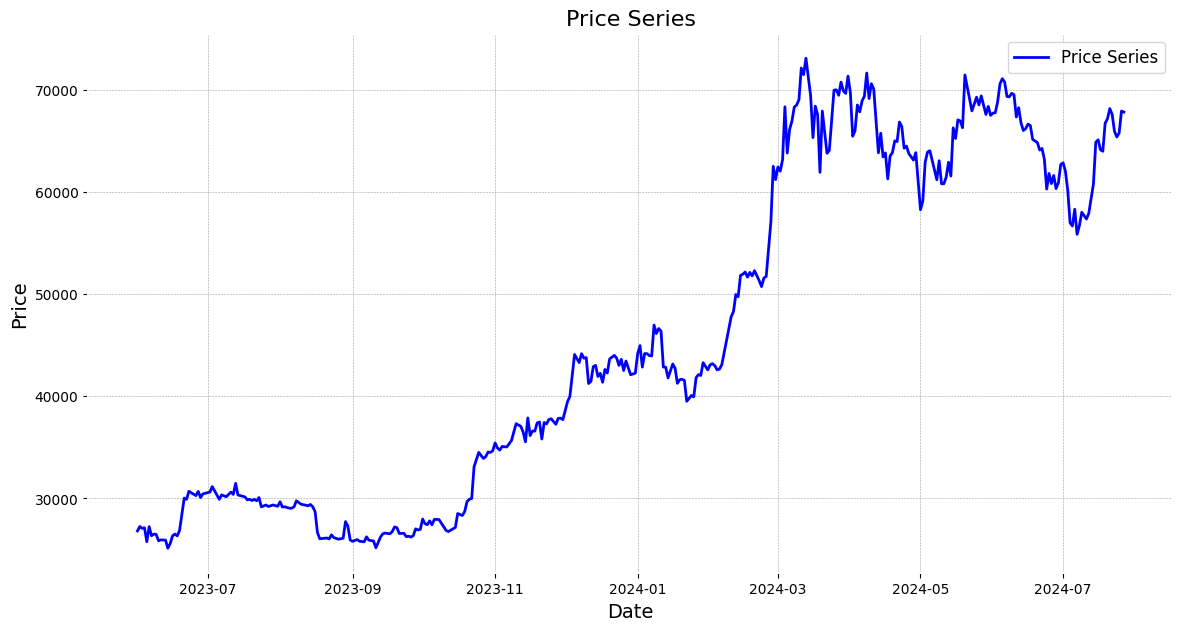

Price Series: This graph shows the evolution of the price of the asset over time.


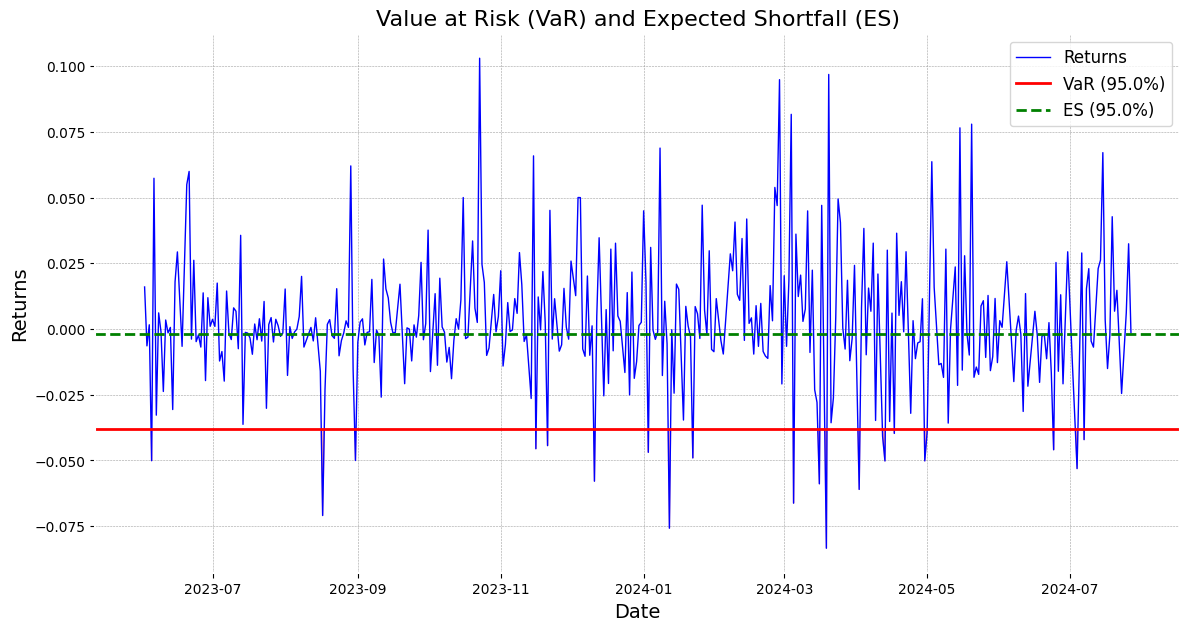

VaR and ES: Value at Risk (VaR) represents the maximum loss expected (with a certain confidence level) over a specified period, while Expected Shortfall (ES) is the average loss during the times when the VaR threshold is exceeded.


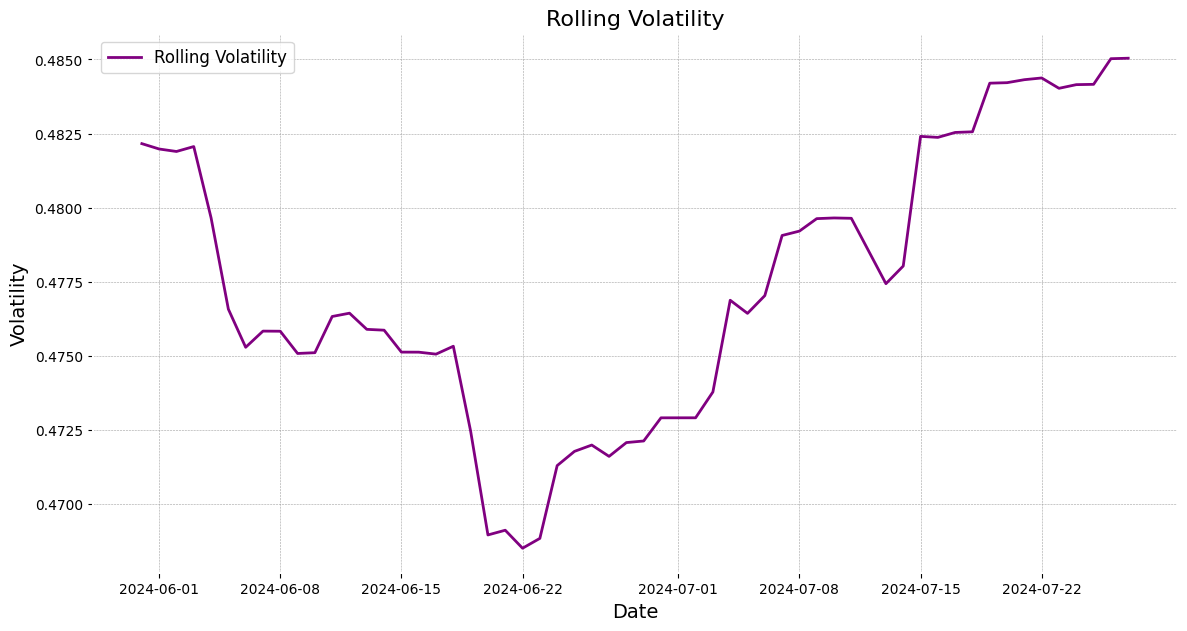

Rolling Volatility: This chart illustrates the changing risk or uncertainty in returns over time, calculated using a rolling window.


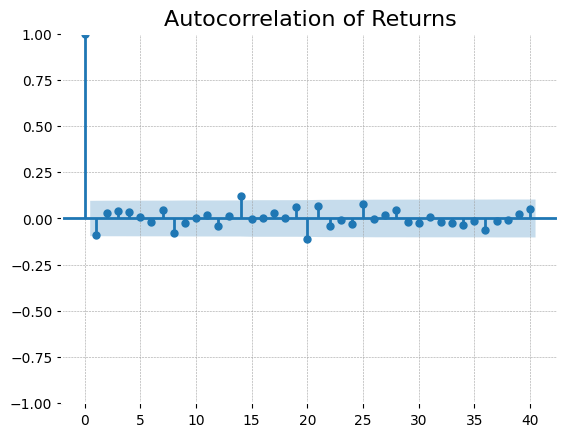

Autocorrelation of Returns: Shows the correlation of the asset's returns with its own past returns over different lags, indicating any patterns or predictability.


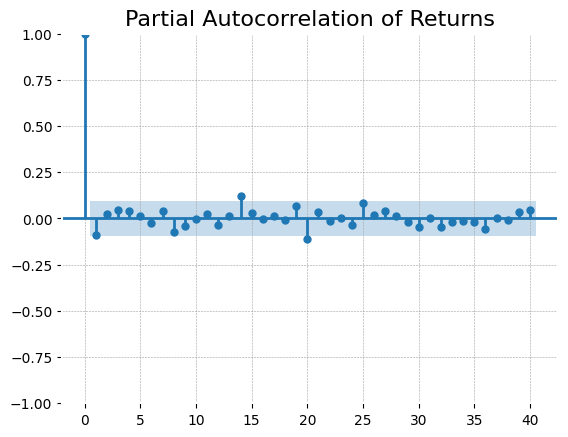

Partial Autocorrelation of Returns: Highlights the direct effect of past returns on future returns, controlling for other lags.


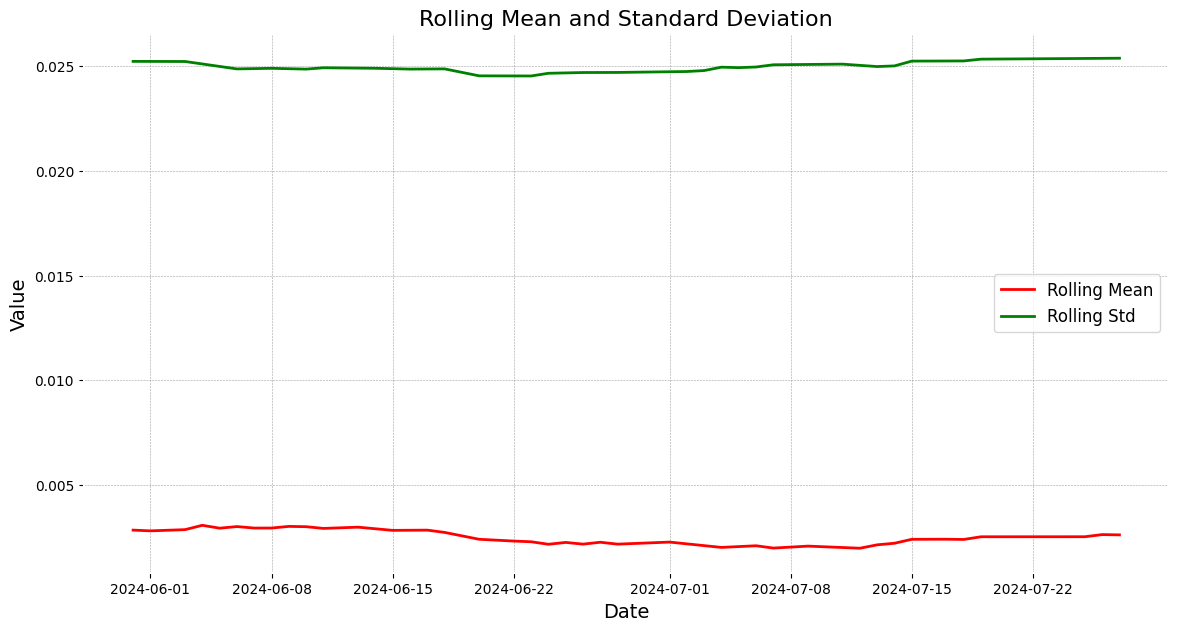

Rolling Mean and Standard Deviation: Demonstrates the average return and risk (volatility) over time, using a rolling window to smooth out short-term fluctuations.


c:\Users\sbrkz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sbrkz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


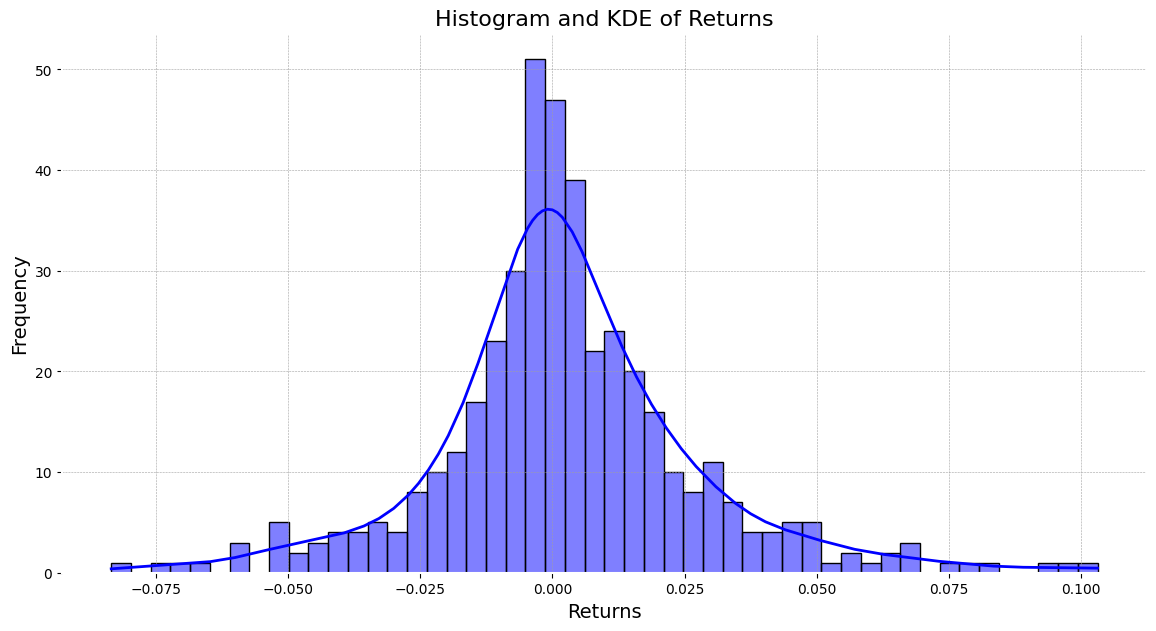

Histogram and KDE of Returns: Provides a visual representation of the distribution of returns, indicating the likelihood of different returns.


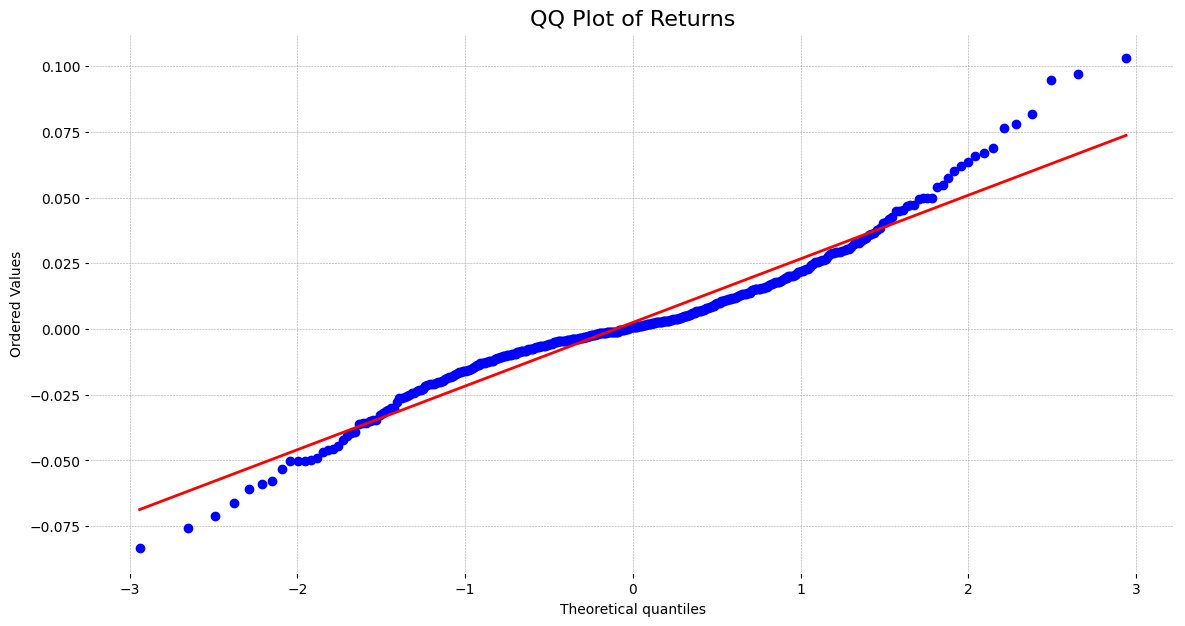

QQ Plot of Returns: Compares the distribution of returns to a normal distribution, highlighting any deviations from normality.


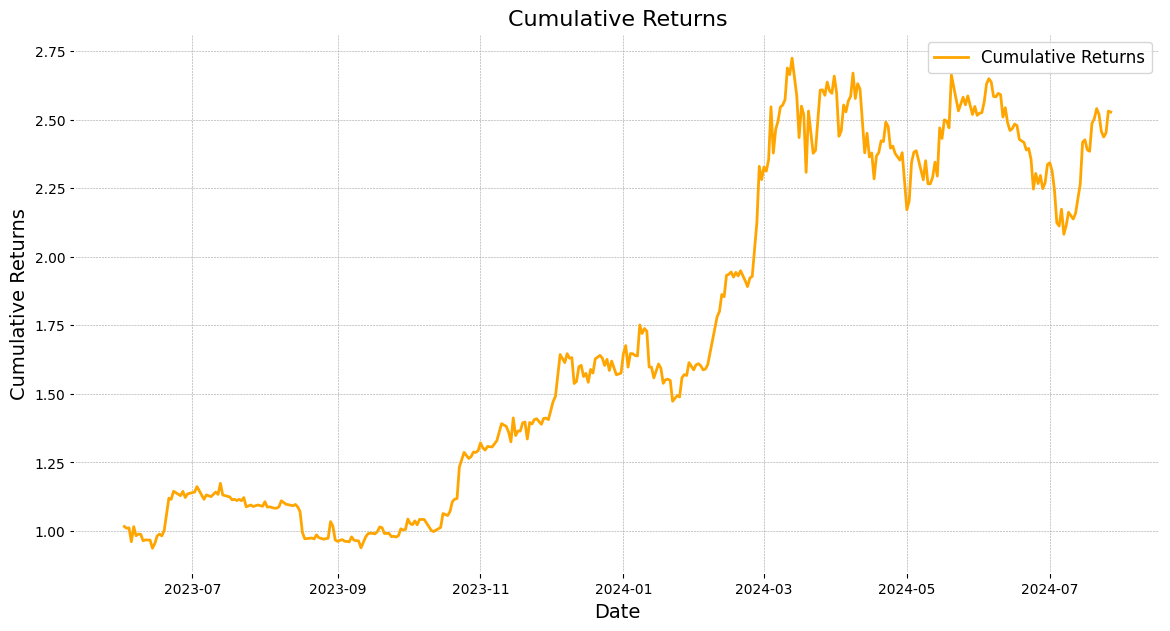

Cumulative Returns: Tracks the total return of the asset over time, assuming all returns are reinvested.

Financial Metrics:
Mean return: 1.5285
Cumulative returns: 1.5285
Volatility: 0.4731
Sharpe ratio: 3.1145
Var: 0.0382
Es: 0.0018
Max drawdown: -0.2358
Sortino ratio: 4.7791
Calmar ratio: 6.4815
Treynor ratio: 1.4700
Information ratio: 59.5031


C:\Users\sbrkz\AppData\Local\Temp\ipykernel_22280\3482428871.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'cumulative_returns': cumulative_returns[-1] - 1,


{'mean_return': 1.5284640221919537,
 'cumulative_returns': 1.5284640221919537,
 'volatility': 0.47309261283831694,
 'sharpe_ratio': 3.1145361018256303,
 'VaR': 0.03822711074669367,
 'ES': 0.0018087505461692732,
 'max_drawdown': -0.2358178060027225,
 'sortino_ratio': 4.77914339489741,
 'calmar_ratio': 6.481546275493326,
 'treynor_ratio': 1.4699724012862851,
 'information_ratio': 59.503128676523765}

In [502]:
financial_metrics(df["BTC"], risk_free_rate=0.055, log_returns=False, trading_days=365, var_es_confidence=0.95)

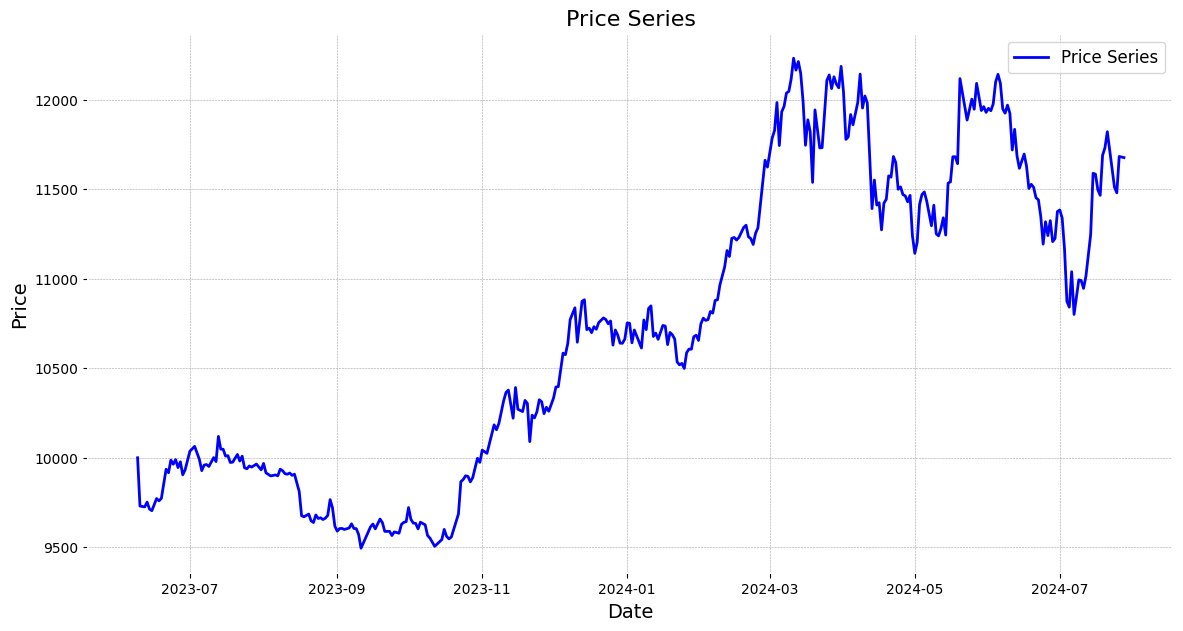

Price Series: This graph shows the evolution of the price of the asset over time.


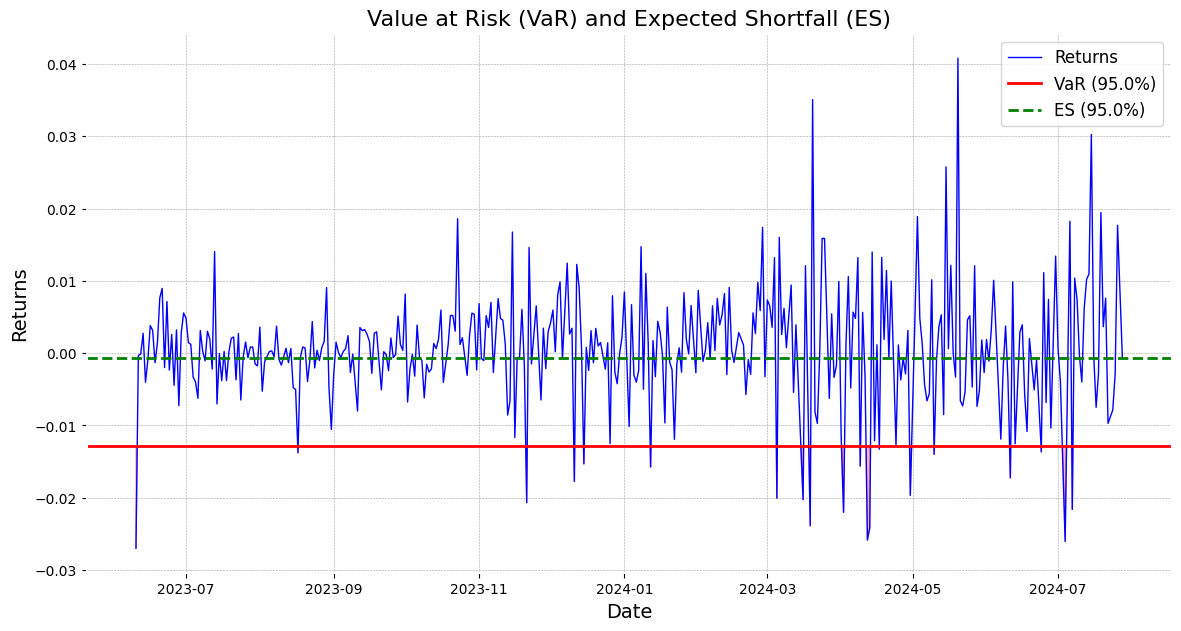

VaR and ES: Value at Risk (VaR) represents the maximum loss expected (with a certain confidence level) over a specified period, while Expected Shortfall (ES) is the average loss during the times when the VaR threshold is exceeded.


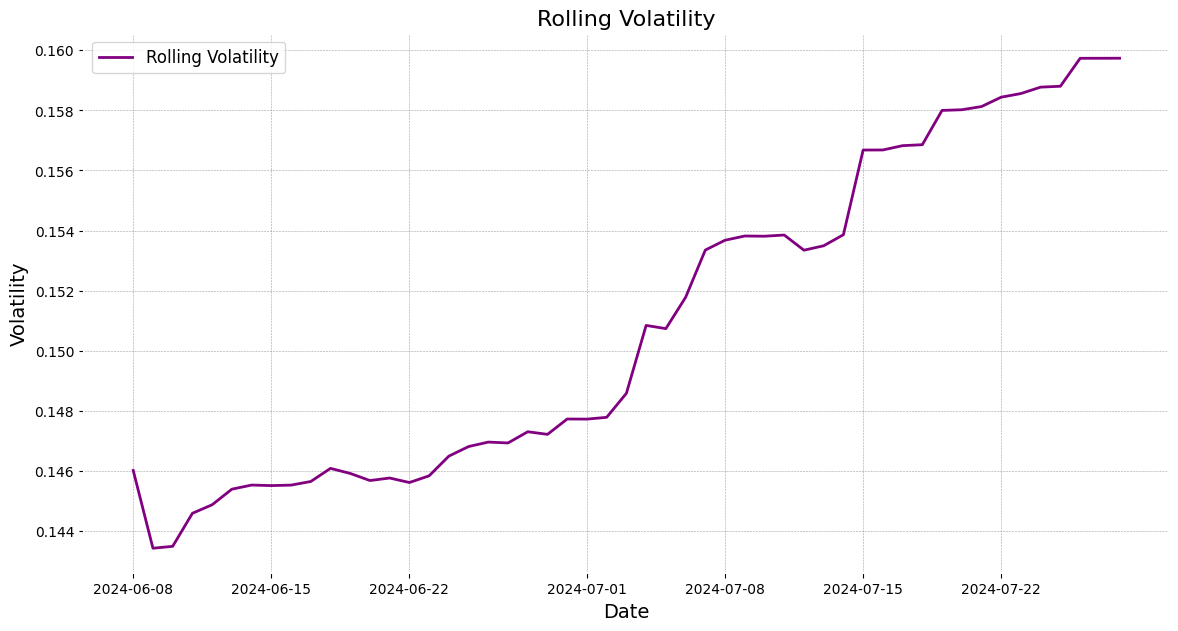

Rolling Volatility: This chart illustrates the changing risk or uncertainty in returns over time, calculated using a rolling window.


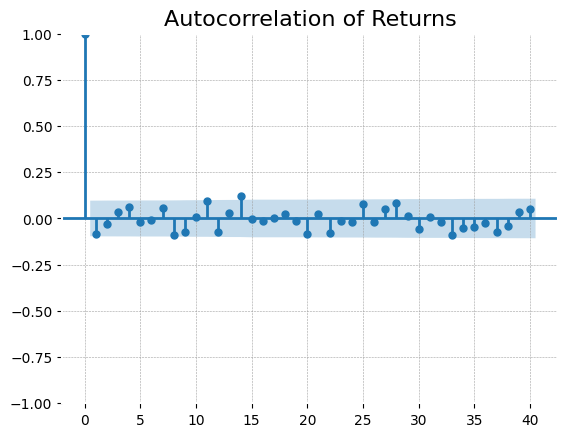

Autocorrelation of Returns: Shows the correlation of the asset's returns with its own past returns over different lags, indicating any patterns or predictability.


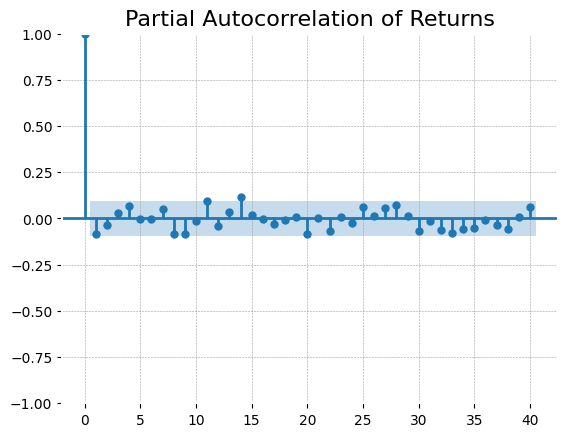

Partial Autocorrelation of Returns: Highlights the direct effect of past returns on future returns, controlling for other lags.


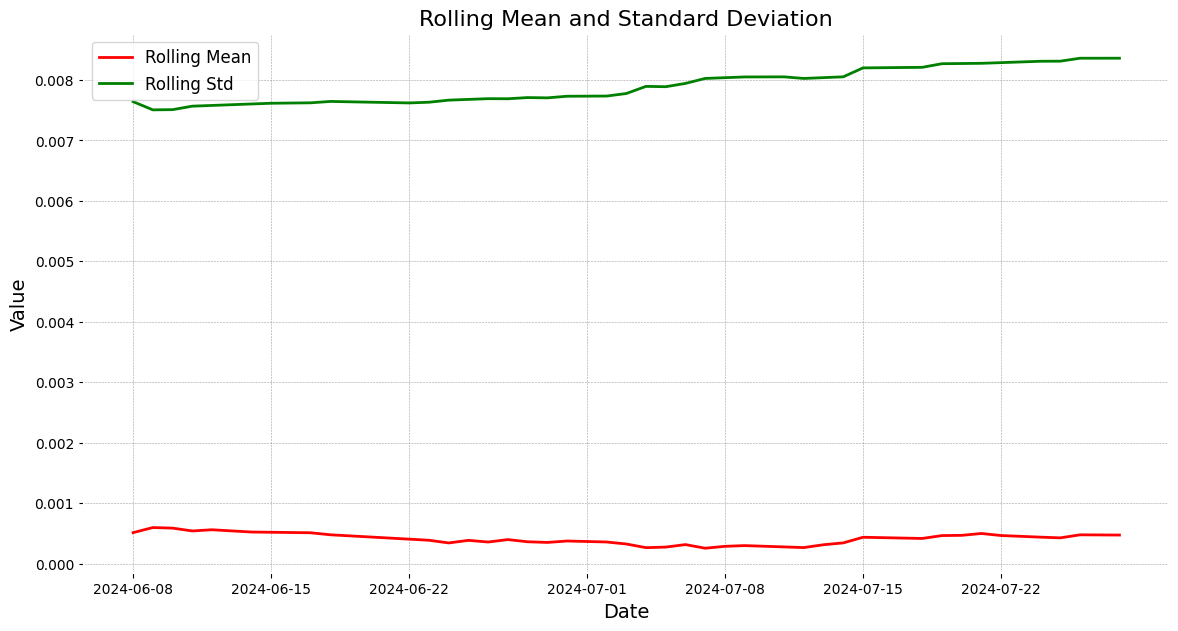

Rolling Mean and Standard Deviation: Demonstrates the average return and risk (volatility) over time, using a rolling window to smooth out short-term fluctuations.


c:\Users\sbrkz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\sbrkz\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


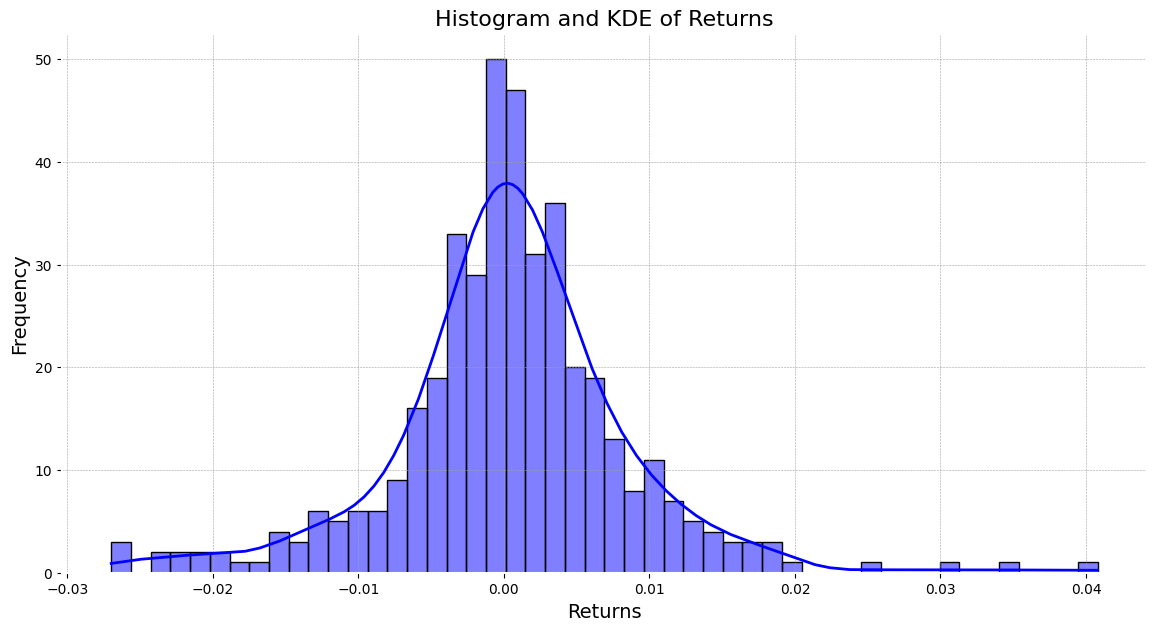

Histogram and KDE of Returns: Provides a visual representation of the distribution of returns, indicating the likelihood of different returns.


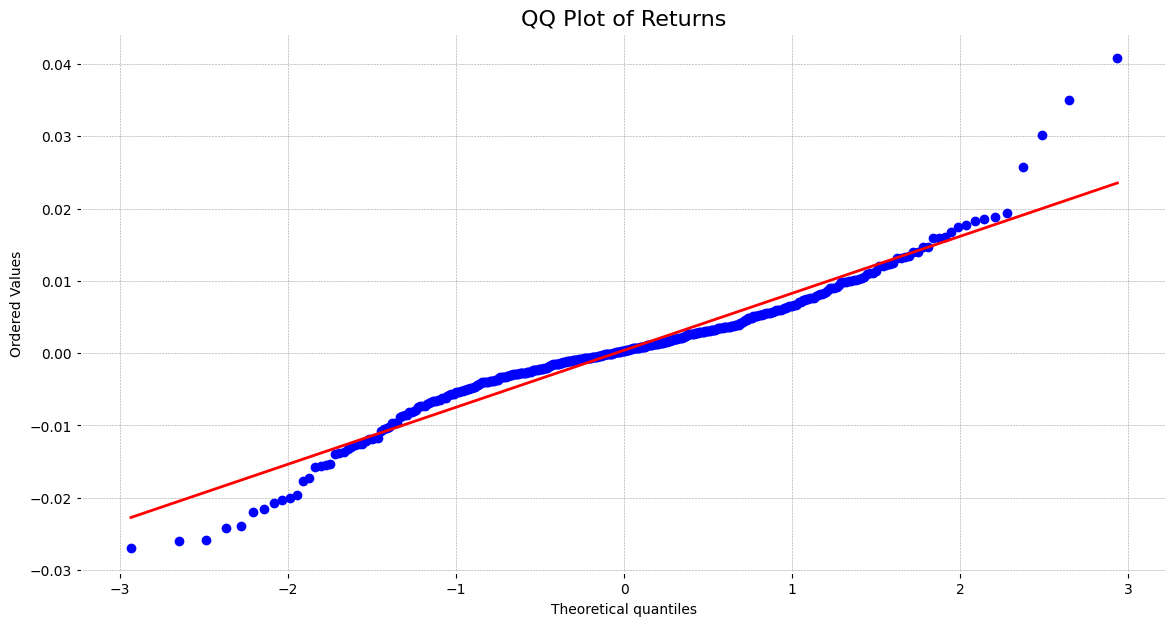

QQ Plot of Returns: Compares the distribution of returns to a normal distribution, highlighting any deviations from normality.


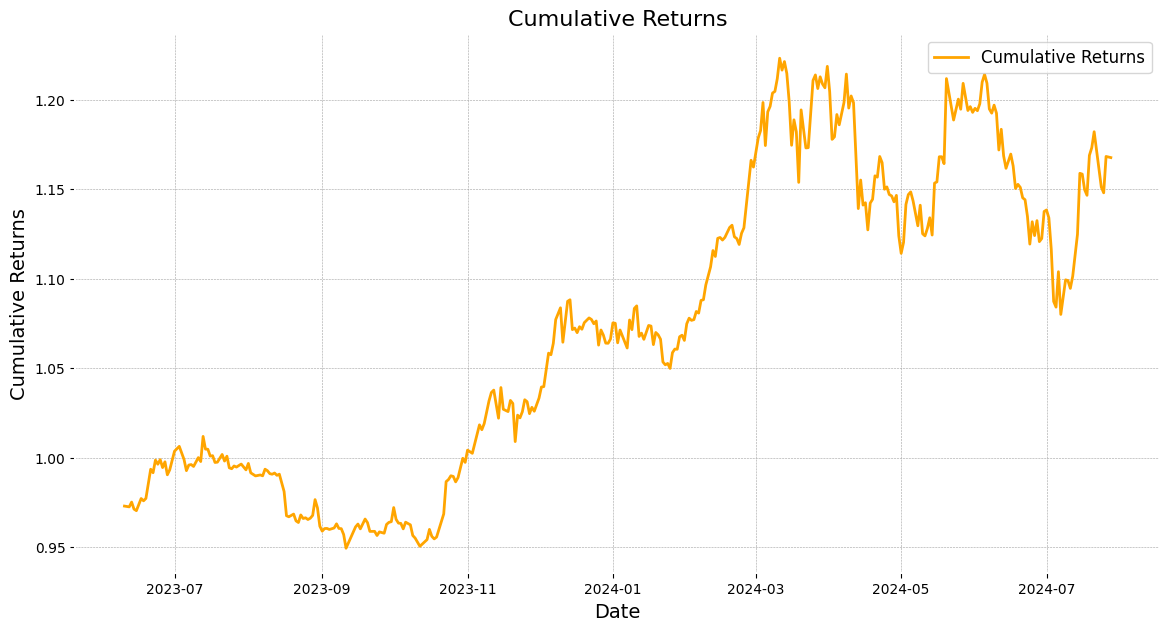

Cumulative Returns: Tracks the total return of the asset over time, assuming all returns are reinvested.

Financial Metrics:
Mean return: 0.1676
Cumulative returns: 0.1676
Volatility: 0.1546
Sharpe ratio: 0.7282
Var: 0.0129
Es: 0.0006
Max drawdown: -0.1169
Sortino ratio: 1.0047
Calmar ratio: 1.4329
Treynor ratio: 0.1123
Information ratio: 13.9124


C:\Users\sbrkz\AppData\Local\Temp\ipykernel_22280\3482428871.py:139: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'cumulative_returns': cumulative_returns[-1] - 1,


{'mean_return': 0.16757411869868744,
 'cumulative_returns': 0.16757411869868744,
 'volatility': 0.15459002938857044,
 'sharpe_ratio': 0.728210733537842,
 'VaR': 0.012902600850012163,
 'ES': 0.0006343589073877184,
 'max_drawdown': -0.11694629025566633,
 'sortino_ratio': 1.0047086982054323,
 'calmar_ratio': 1.4329152154577907,
 'treynor_ratio': 0.11230220053757947,
 'information_ratio': 13.912446529654606}

In [505]:
financial_metrics(Namdar, risk_free_rate=0.055, log_returns=False, trading_days=365, var_es_confidence=0.95)